# Nova Mart Campaign Performance Analysis
## Retail Promotion Effectiveness Study
### By: Erick Kiprotich Yegon
### Date: October 26, 2024

# 1. Background Information

## About Nova Mart
Nova Mart is a prominent retail chain operating across southern India, specializing in providing quality products to diverse customer segments. The company has established a strong presence with 50 stores strategically located across multiple cities, offering their own line of Nova-branded products.

## Business Context
In an effort to boost sales and market penetration, Nova Mart implemented two major promotional campaigns:
- Diwali Campaign 2023
- Sankranti Campaign 2024

These campaigns were designed to:
- Drive sales growth during festive seasons
- Increase market share for Nova-branded products
- Enhance customer engagement and loyalty
- Test different promotional strategies

## Campaign Details
The promotional activities included:
- Coverage: All 50 Nova Mart stores
- Product Focus: Nova-branded products
- Promotional Types: Various strategies including BOGOF (Buy One Get One Free)
- Duration: Specific festival periods (Diwali 2023 and Sankranti 2024)

## Analysis Objectives

### Primary Goals:
1. Evaluate Campaign Effectiveness
   - Compare pre and post-promotion sales
   - Analyze revenue impact
   - Assess unit sales growth

2. Performance Metrics Analysis
   - Calculate and analyze IR% (Incremental Revenue Percentage)
   - Evaluate ISU% (Incremental Sold Units Percentage)
   - Compare metrics across different dimensions:
     * Stores
     * Cities
     * Product categories
     * Campaign types

3. Data Quality Enhancement
   - Ensure data integrity
   - Handle missing values
   - Remove duplicates
   - Standardize metrics

### Key Business Questions:
1. Campaign Performance
   - Which campaign (Diwali or Sankranti) was more successful?
   - What were the best-performing promotional strategies?
   - How did different stores and cities respond to the campaigns?

2. Product Performance
   - Which products showed the highest growth?
   - How did pricing strategies impact sales?
   - Which categories demonstrated the strongest response to promotions?

3. Store Performance
   - Which locations showed the best results?
   - How did urban vs. non-urban stores compare?
   - What patterns emerged in store-level performance?

## Expected Outcomes
This analysis aims to provide:
1. Clear insights into campaign effectiveness
2. Data-driven recommendations for future promotions
3. Understanding of key r store and product strategy

[Rest of the notebook template follows...]

# Load required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy.stats as stats
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Configure pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Maximum column width
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Format float decimals
pd.set_option('display.expand_frame_repr', False)  # Don't wrap long strings


# Loading datasets

In [2]:
campaigns= pd.read_csv('datasets/dim_campaigns.csv')
products =pd.read_csv('datasets/dim_products.csv')
stores= pd.read_csv('datasets/dim_stores.csv')
events = pd.read_csv('datasets/fact_events.csv')

## Campaigns

In [3]:
campaigns.shape

(2, 4)

In [4]:
campaigns.head()

campaign_id campaign_name  start_date    end_date
0  CAMP_DIW_01        Diwali  12-11-2023  18-11-2023
1  CAMP_SAN_01     Sankranti  10-01-2024  16-01-2024

## Products

In [5]:
products.shape

(15, 3)

In [6]:
products.head()

product_code                     product_name           category
0          P01           Atliq_Masoor_Dal (1KG)  Grocery & Staples
1          P02     Atliq_Sonamasuri_Rice (10KG)  Grocery & Staples
2          P03          Atliq_Suflower_Oil (1L)  Grocery & Staples
3          P04     Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples
4          P05  Atliq_Scrub_Sponge_For_Dishwash          Home Care

## Stores

In [7]:
stores.shape

(50, 2)

In [8]:
stores.head()

store_id           city
0  STTRV-0     Trivandrum
1  STMDU-3        Madurai
2  STHYD-6      Hyderabad
3  STVSK-1  Visakhapatnam
4  STCBE-3     Coimbatore

In [9]:
stores.city.value_counts()

city
Bengaluru        10
Chennai           8
Hyderabad         7
Visakhapatnam     5
Coimbatore        5
Madurai           4
Mysuru            4
Mangalore         3
Trivandrum        2
Vijayawada        2
Name: count, dtype: int64

## Events

In [10]:
events.shape

(1510, 9)

In [11]:
events.head()

event_id store_id  campaign_id product_code  base_price(before_promo)  quantity_sold(before_promo)    promo_type  base_price(after_promo)  quantity_sold(after_promo)
0   8481be  STCHE-1  CAMP_DIW_01          P04                       290                      327.000       25% OFF                      217                         287
1   20618e  STCHE-3  CAMP_SAN_01          P04                       370                      379.000         BOGOF                      185                        1622
2   f30579  STBLR-9  CAMP_DIW_01          P02                       860                      337.000       33% OFF                      576                         488
3   4f570c  STBLR-7  CAMP_DIW_01          P05                        55                      122.000       25% OFF                       41                         107
4   6d153f  STHYD-5  CAMP_SAN_01          P15                      3000                      122.000  500 Cashback                     2500                         272

In [12]:
events.duplicated().sum()

10

## Merging the datsets to have one dataframe

In [13]:
store_event_merged= pd.merge(events, stores , on ="store_id", how ='inner')
store_event_merged.head()

event_id store_id  campaign_id product_code  base_price(before_promo)  quantity_sold(before_promo)    promo_type  base_price(after_promo)  quantity_sold(after_promo)       city
0   8481be  STCHE-1  CAMP_DIW_01          P04                       290                      327.000       25% OFF                      217                         287    Chennai
1   20618e  STCHE-3  CAMP_SAN_01          P04                       370                      379.000         BOGOF                      185                        1622    Chennai
2   f30579  STBLR-9  CAMP_DIW_01          P02                       860                      337.000       33% OFF                      576                         488  Bengaluru
3   4f570c  STBLR-7  CAMP_DIW_01          P05                        55                      122.000       25% OFF                       41                         107  Bengaluru
4   6d153f  STHYD-5  CAMP_SAN_01          P15                      3000                      122.000  500 Cashback                     2500                         272  Hyderabad

In [14]:
# merging stores, events and products table
store_event_products_merged =pd.merge(store_event_merged, products, on = 'product_code', how ='inner')
store_event_products_merged.head()

event_id store_id  campaign_id product_code  base_price(before_promo)  quantity_sold(before_promo)    promo_type  base_price(after_promo)  quantity_sold(after_promo)       city                          product_name           category
0   8481be  STCHE-1  CAMP_DIW_01          P04                       290                      327.000       25% OFF                      217                         287    Chennai          Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples
1   20618e  STCHE-3  CAMP_SAN_01          P04                       370                      379.000         BOGOF                      185                        1622    Chennai          Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples
2   f30579  STBLR-9  CAMP_DIW_01          P02                       860                      337.000       33% OFF                      576                         488  Bengaluru          Atliq_Sonamasuri_Rice (10KG)  Grocery & Staples
3   4f570c  STBLR-7  CAMP_DIW_01          P05                        55                      122.000       25% OFF                       41                         107  Bengaluru       Atliq_Scrub_Sponge_For_Dishwash          Home Care
4   6d153f  STHYD-5  CAMP_SAN_01          P15                      3000                      122.000  500 Cashback                     2500                         272  Hyderabad  Atliq_Home_Essential_8_Product_Combo             Combo1

In [15]:
# merging stores, events and products table
store_event_products_campaigns_merged =pd.merge(store_event_products_merged, campaigns, on = 'campaign_id', how ='inner')
store_event_products_campaigns_merged.head()

event_id store_id  campaign_id product_code  base_price(before_promo)  quantity_sold(before_promo)    promo_type  base_price(after_promo)  quantity_sold(after_promo)       city                          product_name           category campaign_name  start_date    end_date
0   8481be  STCHE-1  CAMP_DIW_01          P04                       290                      327.000       25% OFF                      217                         287    Chennai          Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples        Diwali  12-11-2023  18-11-2023
1   20618e  STCHE-3  CAMP_SAN_01          P04                       370                      379.000         BOGOF                      185                        1622    Chennai          Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples     Sankranti  10-01-2024  16-01-2024
2   f30579  STBLR-9  CAMP_DIW_01          P02                       860                      337.000       33% OFF                      576                         488  Bengaluru          Atliq_Sonamasuri_Rice (10KG)  Grocery & Staples        Diwali  12-11-2023  18-11-2023
3   4f570c  STBLR-7  CAMP_DIW_01          P05                        55                      122.000       25% OFF                       41                         107  Bengaluru       Atliq_Scrub_Sponge_For_Dishwash          Home Care        Diwali  12-11-2023  18-11-2023
4   6d153f  STHYD-5  CAMP_SAN_01          P15                      3000                      122.000  500 Cashback                     2500                         272  Hyderabad  Atliq_Home_Essential_8_Product_Combo             Combo1     Sankranti  10-01-2024  16-01-2024

In [16]:
store_event_products_campaigns_merged.columns

Index(['event_id', 'store_id', 'campaign_id', 'product_code',
       'base_price(before_promo)', 'quantity_sold(before_promo)', 'promo_type',
       'base_price(after_promo)', 'quantity_sold(after_promo)', 'city',
       'product_name', 'category', 'campaign_name', 'start_date', 'end_date'],
      dtype='object')

###  Lets Create a copy of the merged dataframes and  save it as a df. We will then re-organize columns bnames so that they are logically


In [17]:
def reorder_columns(df):
    """
    Reorders DataFrame columns in a logical grouping:
    1. Primary keys and identifiers
    2. Product information
    3. Campaign and promotion details
    4. Sales metrics (before promo)
    5. Sales metrics (after promo)
    6. Location information
    7. Date information
    """
    
    column_order = [
        # Primary keys and identifiers
        'event_id',
        'store_id',
        
        # Product information
        'product_code',
        'product_name',
        'category',
        
        # Campaign and promotion details
        'campaign_id',
        'campaign_name',
        'promo_type',
        
        # Sales metrics (before promo)
        'base_price(before_promo)',
        'quantity_sold(before_promo)',
        
        # Sales metrics (after promo)
        'base_price(after_promo)',
        'quantity_sold(after_promo)',
        
        # Location information
        'city',
        
        # Date information
        'start_date',
        'end_date'
    ]
    
    return df[column_order]

In [18]:
df= reorder_columns(store_event_products_campaigns_merged)
df.head()

event_id store_id product_code                          product_name           category  campaign_id campaign_name    promo_type  base_price(before_promo)  quantity_sold(before_promo)  base_price(after_promo)  quantity_sold(after_promo)       city  start_date    end_date
0   8481be  STCHE-1          P04          Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples  CAMP_DIW_01        Diwali       25% OFF                       290                      327.000                      217                         287    Chennai  12-11-2023  18-11-2023
1   20618e  STCHE-3          P04          Atliq_Farm_Chakki_Atta (1KG)  Grocery & Staples  CAMP_SAN_01     Sankranti         BOGOF                       370                      379.000                      185                        1622    Chennai  10-01-2024  16-01-2024
2   f30579  STBLR-9          P02          Atliq_Sonamasuri_Rice (10KG)  Grocery & Staples  CAMP_DIW_01        Diwali       33% OFF                       860                      337.000                      576                         488  Bengaluru  12-11-2023  18-11-2023
3   4f570c  STBLR-7          P05       Atliq_Scrub_Sponge_For_Dishwash          Home Care  CAMP_DIW_01        Diwali       25% OFF                        55                      122.000                       41                         107  Bengaluru  12-11-2023  18-11-2023
4   6d153f  STHYD-5          P15  Atliq_Home_Essential_8_Product_Combo             Combo1  CAMP_SAN_01     Sankranti  500 Cashback                      3000                      122.000                     2500                         272  Hyderabad  10-01-2024  16-01-2024

## Exploratory Data Analysis

In [19]:
df.shape

(1510, 15)

In [20]:
df.duplicated().sum()

10

ouir dataset has 10 cases duplicates. We need to understand what they are

In [21]:
def analyze_duplicates(df):
    """
    Analyzes duplicate records in a DataFrame and returns detailed information about them.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame to analyze
    
    Returns:
    tuple: (duplicate_records, duplicate_summary, value_differences)
    """
    # Get all duplicate rows
    duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
    
    # Get count of duplicates by number of occurrences
    duplicate_counts = duplicates.groupby(df.columns.tolist()).size().reset_index(name='occurrence_count')
    
    # Create a summary of what makes these records duplicates
    duplicate_summary = pd.DataFrame()
    
    # For each group of duplicates, analyze what's identical and what's different
    value_differences = {}
    
    for _, group in duplicates.groupby(duplicates.columns.tolist()):
        if len(group) > 1:
            # Check which columns have different values within this group
            different_cols = []
            identical_cols = []
            
            for col in df.columns:
                if group[col].nunique() > 1:
                    different_cols.append(col)
                else:
                    identical_cols.append(col)
            
            # Store the differences for this group
            sample_record = group.iloc[0].to_dict()
            key = tuple(str(sample_record[col]) for col in ['event_id', 'store_id', 'product_code'])
            value_differences[key] = {
                'identical_columns': identical_cols,
                'different_columns': different_cols,
                'number_of_duplicates': len(group),
                'records': group.to_dict('records')
            }
    
    return duplicates, duplicate_counts, value_differences

# Function to print the analysis in a readable format
def print_duplicate_analysis(duplicates, duplicate_counts, value_differences):
    """
    Prints the duplicate analysis in a readable format
    """
    print(f"Total number of duplicate records: {len(duplicates)}")
    print("\n" + "="*50)
    print("\nDuplicate records breakdown:")
    print("-"*30)
    print(f"Number of unique duplicate groups: {len(duplicate_counts)}")
    
    print("\nDetailed analysis of duplicate groups:")
    print("-"*30)
    for key, info in value_differences.items():
        print(f"\nDuplicate Group for records with key: {key}")
        print(f"Number of duplicates in this group: {info['number_of_duplicates']}")
        
        if info['different_columns']:
            print("\nColumns with different values:")
            for col in info['different_columns']:
                values = set(str(record[col]) for record in info['records'])
                print(f"- {col}: {values}")
        
        print("\nColumns with identical values:")
        print(f"- {', '.join(info['identical_columns'])}")
        print("-"*50)



In [22]:
duplicates, duplicate_counts, value_differences = analyze_duplicates(df)
print_duplicate_analysis(duplicates, duplicate_counts, value_differences)

Total number of duplicate records: 20


Duplicate records breakdown:
------------------------------
Number of unique duplicate groups: 10

Detailed analysis of duplicate groups:
------------------------------

Duplicate Group for records with key: ('0491f4', 'STVSK-2', 'P11')
Number of duplicates in this group: 2

Columns with identical values:
- event_id, store_id, product_code, product_name, category, campaign_id, campaign_name, promo_type, base_price(before_promo), quantity_sold(before_promo), base_price(after_promo), quantity_sold(after_promo), city, start_date, end_date
--------------------------------------------------

Duplicate Group for records with key: ('0f8686', 'STVSK-0', 'P07')
Number of duplicates in this group: 2

Columns with identical values:
- event_id, store_id, product_code, product_name, category, campaign_id, campaign_name, promo_type, base_price(before_promo), quantity_sold(before_promo), base_price(after_promo), quantity_sold(after_promo), city, start_date, end

In [23]:
duplicates

event_id store_id product_code                               product_name           category  campaign_id campaign_name    promo_type  base_price(before_promo)  quantity_sold(before_promo)  base_price(after_promo)  quantity_sold(after_promo)           city  start_date    end_date
333     0491f4  STVSK-2          P11      Atliq_Doodh_Kesar_Body_Lotion (200ML)      Personal Care  CAMP_DIW_01        Diwali       50% OFF                       190                       38.000                       95                          58  Visakhapatnam  12-11-2023  18-11-2023
1227    0491f4  STVSK-2          P11      Atliq_Doodh_Kesar_Body_Lotion (200ML)      Personal Care  CAMP_DIW_01        Diwali       50% OFF                       190                       38.000                       95                          58  Visakhapatnam  12-11-2023  18-11-2023
703     0f8686  STVSK-0          P07                             Atliq_Curtains          Home Care  CAMP_SAN_01     Sankranti         BOGOF                       300                       24.000                      150                          92  Visakhapatnam  10-01-2024  16-01-2024
759     0f8686  STVSK-0          P07                             Atliq_Curtains          Home Care  CAMP_SAN_01     Sankranti         BOGOF                       300                       24.000                      150                          92  Visakhapatnam  10-01-2024  16-01-2024
40      46d57b  STBLR-9          P13                Atliq_High_Glo_15W_LED_Bulb    Home Appliances  CAMP_DIW_01        Diwali         BOGOF                       350                       94.000                      175                         329      Bengaluru  12-11-2023  18-11-2023
74      46d57b  STBLR-9          P13                Atliq_High_Glo_15W_LED_Bulb    Home Appliances  CAMP_DIW_01        Diwali         BOGOF                       350                       94.000                      175                         329      Bengaluru  12-11-2023  18-11-2023
423     491ff2  STVJD-1          P12        Atliq_Lime_Cool_Bathing_Bar (125GM)      Personal Care  CAMP_SAN_01     Sankranti       50% OFF                        62                       30.000                       31                          42     Vijayawada  10-01-2024  16-01-2024
922     491ff2  STVJD-1          P12        Atliq_Lime_Cool_Bathing_Bar (125GM)      Personal Care  CAMP_SAN_01     Sankranti       50% OFF                        62                       30.000                       31                          42     Vijayawada  10-01-2024  16-01-2024
126     4ad12b  STBLR-4          P15       Atliq_Home_Essential_8_Product_Combo             Combo1  CAMP_DIW_01        Diwali  500 Cashback                      3000                      407.000                     2500                        1245      Bengaluru  12-11-2023  18-11-2023
1003    4ad12b  STBLR-4          P15       Atliq_Home_Essential_8_Product_Combo             Combo1  CAMP_DIW_01        Diwali  500 Cashback                      3000                      407.000                     2500                        1245      Bengaluru  12-11-2023  18-11-2023
738     5c7b20  STCBE-4          P05            Atliq_Scrub_Sponge_For_Dishwash          Home Care  CAMP_DIW_01        Diwali       25% OFF                        55                      101.000                       41                          89     Coimbatore  12-11-2023  18-11-2023
1313    5c7b20  STCBE-4          P05            Atliq_Scrub_Sponge_For_Dishwash          Home Care  CAMP_DIW_01        Diwali       25% OFF                        55                      101.000                       41                          89     Coimbatore  12-11-2023  18-11-2023
395   6.24E+11  STMLR-0          P03                    Atliq_Suflower_Oil (1L)  Grocery & Staples  CAMP_SAN_01     Sankranti         BOGOF                       200                      206.000                      100                         541      Mangalore  10-01-2024 

In [24]:
# First, let's see the duplicates you're about to remove
duplicates_to_remove = df[df.duplicated(keep='last')]
print(f"Number of rows that will be removed: {len(duplicates_to_remove)}")

# Remove duplicates, keeping the last occurrence
df_cleaned = df.drop_duplicates(keep='last')

# Verify the removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

# If you want to overwrite your original dataframe:
df = df_cleaned

Number of rows that will be removed: 10
Original dataset shape: (1510, 15)
Cleaned dataset shape: (1500, 15)


In [25]:
df.duplicated().sum()

0

### We have dealth with duplicates

In [26]:
# Check missing values
df.isna().sum()

event_id                        0
store_id                        0
product_code                    0
product_name                    0
category                        0
campaign_id                     0
campaign_name                   0
promo_type                      0
base_price(before_promo)        0
quantity_sold(before_promo)    20
base_price(after_promo)         0
quantity_sold(after_promo)      0
city                            0
start_date                      0
end_date                        0
dtype: int64

### quantity_sold(before_promo)     has 20 missing values We need to understand them

In [27]:
# Create DataFrame with missing quantity_sold(before_promo)
missing_qty_df = df[df['quantity_sold(before_promo)'].isna()]

missing_qty_df 

event_id store_id product_code                               product_name           category  campaign_id campaign_name    promo_type  base_price(before_promo)  quantity_sold(before_promo)  base_price(after_promo)  quantity_sold(after_promo)           city  start_date    end_date
63     70c312  STHYD-4          P13                Atliq_High_Glo_15W_LED_Bulb    Home Appliances  CAMP_SAN_01     Sankranti         BOGOF                       350                          NaN                      175                         534      Hyderabad  10-01-2024  16-01-2024
119    d31787  STMYS-2          P10    Atliq_Cream_Beauty_Bathing_Soap (125GM)      Personal Care  CAMP_SAN_01     Sankranti       25% OFF                        50                          NaN                       37                          20         Mysuru  10-01-2024  16-01-2024
141    141d98  STCHE-4          P03                    Atliq_Suflower_Oil (1L)  Grocery & Staples  CAMP_SAN_01     Sankranti         BOGOF                       200                          NaN                      100                        1695        Chennai  10-01-2024  16-01-2024
163    873333  STMLR-0          P15       Atliq_Home_Essential_8_Product_Combo             Combo1  CAMP_DIW_01        Diwali  500 Cashback                      3000                          NaN                     2500                         509      Mangalore  12-11-2023  18-11-2023
341    2ef46d  STMDU-0          P02               Atliq_Sonamasuri_Rice (10KG)  Grocery & Staples  CAMP_DIW_01        Diwali       33% OFF                       860                          NaN                      576                         430        Madurai  12-11-2023  18-11-2023
391    5372de  STCBE-3          P10    Atliq_Cream_Beauty_Bathing_Soap (125GM)      Personal Care  CAMP_SAN_01     Sankranti       25% OFF                        50                          NaN                       37                          22     Coimbatore  10-01-2024  16-01-2024
558    77435f  STBLR-3          P01                     Atliq_Masoor_Dal (1KG)  Grocery & Staples  CAMP_SAN_01     Sankranti       33% OFF                       172                          NaN                      115                         387      Bengaluru  10-01-2024  16-01-2024
714    a1ef43  STTRV-1          P12        Atliq_Lime_Cool_Bathing_Bar (125GM)      Personal Care  CAMP_SAN_01     Sankranti       50% OFF                        62                          NaN                       31                          38     Trivandrum  10-01-2024  16-01-2024
745    95f061  STMYS-3          P15       Atliq_Home_Essential_8_Product_Combo             Combo1  CAMP_SAN_01     Sankranti  500 Cashback                      3000                          NaN                     2500                         443         Mysuru  10-01-2024  16-01-2024
758    5f313a  STCHE-2          P10    Atliq_Cream_Beauty_Bathing_Soap (125GM)      Personal Care  CAMP_DIW_01        Diwali       50% OFF                        65                          NaN                       32                         135        Chennai  12-11-2023  18-11-2023
924    e45c30  STMDU-1          P06            Atliq_Fusion_Container_Set_of_3          Home Care  CAMP_DIW_01        Diwali       25% OFF                       415                          NaN                      311                          63        Madurai  12-11-2023  18-11-2023
967    7c8fd1  STMYS-3          P15       Atliq_Home_Essential_8_Product_Combo             Combo1  CAMP_DIW_01        Diwali  500 Cashback                      3000                          NaN                     2500                        1472         Mysuru  12-11-2023  18-11-2023
1035   36968d  STMDU-1          P02               Atliq_Sonamasuri_Rice (10KG)  Grocery & Staples  CAMP_SAN_01     Sankranti       33% OFF                       860                          NaN                      576                         404        Madurai  10-01-2024  16-01-2024
1

In [28]:
# First let's store the original number of missing values
original_missing = df['quantity_sold(before_promo)'].isna().sum()

# Calculate the median of quantity_sold(before_promo)
median_qty = df['quantity_sold(before_promo)'].median()

# Fill missing values with median
df['quantity_sold(before_promo)'] = df['quantity_sold(before_promo)'].fillna(median_qty)

# Verify the fill
new_missing = df['quantity_sold(before_promo)'].isna().sum()

print(f"Original number of missing values: {original_missing}")
print(f"Median value used for filling: {median_qty:.2f}")
print(f"Number of missing values after filling: {new_missing}")

# Show a sample of rows that were filled
filled_rows = df[df['quantity_sold(before_promo)'] == median_qty]
print("\nSample of filled rows (showing relevant columns):")
print(filled_rows[['store_id', 'product_code', 'quantity_sold(before_promo)', 
                   'quantity_sold(after_promo)']].head())

Original number of missing values: 20
Median value used for filling: 78.00
Number of missing values after filling: 0

Sample of filled rows (showing relevant columns):
    store_id product_code  quantity_sold(before_promo)  quantity_sold(after_promo)
63   STHYD-4          P13                       78.000                         534
119  STMYS-2          P10                       78.000                          20
141  STCHE-4          P03                       78.000                        1695
163  STMLR-0          P15                       78.000                         509
195  STVSK-0          P12                       78.000                         121


In [29]:
# Calculate mean base price for each category (using groupby)
category_prices = df.groupby('category')['base_price(before_promo)'].agg([
    'mean',
    'min',
    'max',
    'count'
]).round(2)

# Sort by mean price to see categories from lowest to highest
category_prices_sorted = category_prices.sort_values('mean')

print("Category Price Analysis (Before Promotion):")
print("-" * 50)
print(category_prices_sorted)

# Find the category with the lowest base price
lowest_price_category = category_prices_sorted.index[0]
lowest_mean_price = category_prices_sorted.iloc[0]['mean']

print(f"\nCategory with lowest average base price: {lowest_price_category}")
print(f"Average base price: ${lowest_mean_price:.2f}")

# Let's see some example products from this category
print(f"\nSample products from {lowest_price_category} category:")
lowest_cat_products = df[df['category'] == lowest_price_category][
    ['product_name', 'base_price(before_promo)', 'category']
].drop_duplicates().sort_values('base_price(before_promo)').head()
print(lowest_cat_products)

Category Price Analysis (Before Promotion):
--------------------------------------------------
                      mean   min   max  count
category                                     
Personal Care      102.380    50   190    400
Grocery & Staples  385.000   156   860    400
Home Care          490.000    55  1190    400
Home Appliances    685.000   350  1020    200
Combo1            3000.000  3000  3000    100

Category with lowest average base price: Personal Care
Average base price: $102.38

Sample products from Personal Care category:
                                 product_name  base_price(before_promo)       category
12    Atliq_Cream_Beauty_Bathing_Soap (125GM)                        50  Personal Care
73        Atliq_Lime_Cool_Bathing_Bar (125GM)                        62  Personal Care
19    Atliq_Cream_Beauty_Bathing_Soap (125GM)                        65  Personal Care
11  Atliq_Body_Milk_Nourishing_Lotion (120ML)                        90  Personal Care
47  Atliq_Body_Mil

In [30]:
# First, let's create a filter for BOGOF promos during Diwali campaign
diwali_bogof = df[
    (df['promo_type'] == 'BOGOF') & 
    (df['campaign_name'].str.contains('Diwali', case=False, na=False))
]

# Calculate total quantity sold after promotion
total_qty = diwali_bogof['quantity_sold(after_promo)'].sum()

# Get some additional insights
results = {
    'Total Quantity Sold': total_qty,
    'Number of Products': len(diwali_bogof),
    'Average Quantity per Product': diwali_bogof['quantity_sold(after_promo)'].mean(),
    'Total Products Categories': diwali_bogof['category'].nunique()
}

print("BOGOF Promotions during Diwali Campaign Analysis:")
print("-" * 50)
for metric, value in results.items():
    print(f"{metric}: {value:,.2f}")

# Show breakdown by category
print("\nBreakdown by Category:")
category_breakdown = diwali_bogof.groupby('category')['quantity_sold(after_promo)'].agg([
    'sum',
    'count',
    'mean'
]).round(2)
print(category_breakdown.sort_values('sum', ascending=False))

BOGOF Promotions during Diwali Campaign Analysis:
--------------------------------------------------
Total Quantity Sold: 34,461.00
Number of Products: 200.00
Average Quantity per Product: 172.31
Total Products Categories: 2.00

Breakdown by Category:
                   sum  count    mean
category                             
Home Appliances  18003    100 180.030
Home Care        16458    100 164.580


In [31]:
# Filter for Diwali campaign
diwali_sales = df[df['campaign_name'].str.contains('Diwali', case=False, na=False)]

# Group by store and calculate total quantity sold
store_sales = diwali_sales.groupby('store_id').agg({
    'quantity_sold(after_promo)': 'sum',
    'city': 'first',  # get city for each store
    'product_code': 'count'  # count number of products
}).round(2)

# Sort by quantity sold
store_sales_sorted = store_sales.sort_values('quantity_sold(after_promo)', ascending=False)

# Rename columns for clarity
store_sales_sorted.columns = ['Total Quantity Sold', 'City', 'Number of Products']

# Get the top store
top_store = store_sales_sorted.iloc[0]

print("Top Performing Store During Diwali Campaign:")
print("-" * 50)
print(f"Store ID: {store_sales_sorted.index[0]}")
print(f"City: {top_store['City']}")
print(f"Total Quantity Sold: {top_store['Total Quantity Sold']:,.0f}")
print(f"Number of Products: {top_store['Number of Products']:,.0f}")

# Show top 5 stores
print("\nTop 5 Stores by Quantity Sold:")
print(store_sales_sorted.head())

# Additional analysis for top store
print("\nTop Products in the Best-Performing Store:")
top_store_products = diwali_sales[
    diwali_sales['store_id'] == store_sales_sorted.index[0]
].groupby(['product_name', 'category'])['quantity_sold(after_promo)'].sum().sort_values(ascending=False).head()
print(top_store_products)

Top Performing Store During Diwali Campaign:
--------------------------------------------------
Store ID: STCHE-4
City: Chennai
Total Quantity Sold: 5,013
Number of Products: 15

Top 5 Stores by Quantity Sold:
          Total Quantity Sold       City  Number of Products
store_id                                                    
STCHE-4                  5013    Chennai                  15
STBLR-7                  4893  Bengaluru                  15
STBLR-6                  4857  Bengaluru                  15
STMYS-1                  4779     Mysuru                  15
STCHE-7                  4779    Chennai                  15

Top Products in the Best-Performing Store:
product_name                          category         
Atliq_Home_Essential_8_Product_Combo  Combo1               1545
Atliq_Sonamasuri_Rice (10KG)          Grocery & Staples     580
Atliq_Masoor_Dal (1KG)                Grocery & Staples     503
Atliq_High_Glo_15W_LED_Bulb           Home Appliances       338
Atliq_S

In [32]:
# Create masks for each campaign
sankranti_mask = df['campaign_name'].str.contains('Sankranti', case=False, na=False)
diwali_mask = df['campaign_name'].str.contains('Diwali', case=False, na=False)

# Function to calculate campaign metrics
def analyze_campaign(campaign_data, campaign_name):
    total_before = campaign_data['quantity_sold(before_promo)'].sum()
    total_after = campaign_data['quantity_sold(after_promo)'].sum()
    
    return {
        'Campaign': campaign_name,
        'Total Quantity Before': total_before,
        'Total Quantity After': total_after,
        'Absolute Increase': total_after - total_before,
        'Percentage Increase': ((total_after - total_before) / total_before * 100),
        'Number of Products': len(campaign_data),
        'Number of Stores': campaign_data['store_id'].nunique(),
        'Average Increase Per Product': (total_after - total_before) / len(campaign_data)
    }

# Get metrics for both campaigns
sankranti_metrics = analyze_campaign(df[sankranti_mask], 'Sankranti')
diwali_metrics = analyze_campaign(df[diwali_mask], 'Diwali')

# Create a comparison DataFrame
comparison_df = pd.DataFrame([sankranti_metrics, diwali_metrics])
print("Overall Campaign Comparison:")
print("-" * 80)
print(comparison_df.round(2))

# Analyze by promo type for each campaign
print("\nBreakdown by Promotion Type:")
print("-" * 80)
for campaign_mask, campaign_name in [(sankranti_mask, 'Sankranti'), (diwali_mask, 'Diwali')]:
    campaign_data = df[campaign_mask]
    promo_analysis = campaign_data.groupby('promo_type').agg({
        'quantity_sold(before_promo)': 'sum',
        'quantity_sold(after_promo)': 'sum',
        'product_code': 'count'
    })
    
    promo_analysis['sales_increase'] = promo_analysis['quantity_sold(after_promo)'] - promo_analysis['quantity_sold(before_promo)']
    promo_analysis['increase_percentage'] = (promo_analysis['sales_increase'] / promo_analysis['quantity_sold(before_promo)'] * 100).round(2)
    
    print(f"\n{campaign_name} Campaign - Promotion Type Analysis:")
    print(promo_analysis)

# Category performance comparison
print("\nTop Performing Categories in Each Campaign:")
print("-" * 80)
for campaign_mask, campaign_name in [(sankranti_mask, 'Sankranti'), (diwali_mask, 'Diwali')]:
    campaign_data = df[campaign_mask]
    category_analysis = campaign_data.groupby('category').agg({
        'quantity_sold(before_promo)': 'sum',
        'quantity_sold(after_promo)': 'sum'
    })
    
    category_analysis['increase_percentage'] = ((category_analysis['quantity_sold(after_promo)'] - 
                                               category_analysis['quantity_sold(before_promo)']) / 
                                              category_analysis['quantity_sold(before_promo)'] * 100).round(2)
    
    print(f"\n{campaign_name} Campaign - Top Categories by Sales Increase:")
    print(category_analysis.sort_values('increase_percentage', ascending=False).head())

Overall Campaign Comparison:
--------------------------------------------------------------------------------
    Campaign  Total Quantity Before  Total Quantity After  Absolute Increase  Percentage Increase  Number of Products  Number of Stores  Average Increase Per Product
0  Sankranti              97894.000                252069         154175.000              157.490                 750                50                       205.570
1     Diwali             109756.000                183404          73648.000               67.100                 750                50                        98.200

Breakdown by Promotion Type:
--------------------------------------------------------------------------------

Sankranti Campaign - Promotion Type Analysis:
              quantity_sold(before_promo)  quantity_sold(after_promo)  product_code  sales_increase  increase_percentage
promo_type                                                                                                       

In [33]:
# Filter for Sankranti campaign
sankranti_df = df[df['campaign_name'].str.contains('Sankranti', case=False, na=False)]

# Calculate revenue before and after for each product
sankranti_analysis = sankranti_df.groupby('product_name').agg({
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum',
    'base_price(before_promo)': 'first',  # assuming same base price for same product
    'base_price(after_promo)': 'first'
}).reset_index()

# Calculate revenues
sankranti_analysis['revenue_before'] = (
    sankranti_analysis['base_price(before_promo)'] * 
    sankranti_analysis['quantity_sold(before_promo)']
)
sankranti_analysis['revenue_after'] = (
    sankranti_analysis['base_price(after_promo)'] * 
    sankranti_analysis['quantity_sold(after_promo)']
)

# Calculate IR%
sankranti_analysis['IR%'] = (
    (sankranti_analysis['revenue_after'] - sankranti_analysis['revenue_before']) / 
    sankranti_analysis['revenue_before'] * 100
)

# Get product with highest IR%
top_product = sankranti_analysis.sort_values('IR%', ascending=False).iloc[0]

print("Verification Details:")
print(f"Product: {top_product['product_name']}")
print(f"Base Price Before: {top_product['base_price(before_promo)']}")
print(f"Base Price After: {top_product['base_price(after_promo)']}")
print(f"Quantity Before: {top_product['quantity_sold(before_promo)']}")
print(f"Quantity After: {top_product['quantity_sold(after_promo)']}")
print(f"Revenue Before: {top_product['revenue_before']:.2f}")
print(f"Revenue After: {top_product['revenue_after']:.2f}")
print(f"IR%: {top_product['IR%']:.2f}%")

# Format final answer
answer = f"{top_product['product_name']},{top_product['IR%']:.2f}"
print("\nFormatted Answer:")
print(answer)

Verification Details:
Product: Atliq_Suflower_Oil (1L)
Base Price Before: 200
Base Price After: 100
Quantity Before: 15948.0
Quantity After: 61185
Revenue Before: 3189600.00
Revenue After: 6118500.00
IR%: 91.83%

Formatted Answer:
Atliq_Suflower_Oil (1L),91.83


In [34]:
# Filter for Diwali campaign and Visakhapatnam stores
vizag_diwali = df[
    (df['campaign_name'].str.contains('Diwali', case=False, na=False)) & 
    (df['city'] == 'Visakhapatnam')
]

# Calculate ISU% for each store
store_analysis = vizag_diwali.groupby('store_id').agg({
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum'
}).reset_index()

# Calculate ISU%
store_analysis['ISU%'] = (
    (store_analysis['quantity_sold(after_promo)'] - store_analysis['quantity_sold(before_promo)']) / 
    store_analysis['quantity_sold(before_promo)'] * 100
)

# Get store with lowest ISU%
worst_store = store_analysis.sort_values('ISU%').iloc[0]

# Print verification details
print("Verification Details:")
print(f"Store ID: {worst_store['store_id']}")
print(f"Quantity Before: {worst_store['quantity_sold(before_promo)']}")
print(f"Quantity After: {worst_store['quantity_sold(after_promo)']}")
print(f"ISU%: {worst_store['ISU%']:.2f}%")

# Format answer
answer = f"{worst_store['store_id']},{worst_store['ISU%']:.2f}"
print("\nFormatted Answer:")
print(answer)

# Show all stores for verification
print("\nAll Visakhapatnam stores ISU% during Diwali:")
print(store_analysis.sort_values('ISU%'))

Verification Details:
Store ID: STVSK-3
Quantity Before: 1780.0
Quantity After: 2656
ISU%: 49.21%

Formatted Answer:
STVSK-3,49.21

All Visakhapatnam stores ISU% during Diwali:
  store_id  quantity_sold(before_promo)  quantity_sold(after_promo)   ISU%
3  STVSK-3                     1780.000                        2656 49.213
4  STVSK-4                     1926.000                        2908 50.987
1  STVSK-1                     1903.000                        3078 61.745
2  STVSK-2                     1701.000                        2860 68.136
0  STVSK-0                     1768.000                        3005 69.966


In [35]:
# Filter for Sankranti campaign
sankranti_df = df[df['campaign_name'].str.contains('Sankranti', case=False, na=False)]

# Calculate metrics by promo type
promo_analysis = sankranti_df.groupby('promo_type').agg({
    'quantity_sold(before_promo)': 'sum',
    'quantity_sold(after_promo)': 'sum',
    'base_price(before_promo)': lambda x: (x * sankranti_df.loc[x.index, 'quantity_sold(before_promo)']).sum(),
    'base_price(after_promo)': lambda x: (x * sankranti_df.loc[x.index, 'quantity_sold(after_promo)']).sum()
}).reset_index()

# Calculate ISU%
promo_analysis['ISU%'] = (
    (promo_analysis['quantity_sold(after_promo)'] - promo_analysis['quantity_sold(before_promo)']) / 
    promo_analysis['quantity_sold(before_promo)'] * 100
)

# Calculate IR%
promo_analysis['IR%'] = (
    (promo_analysis['base_price(after_promo)'] - promo_analysis['base_price(before_promo)']) / 
    promo_analysis['base_price(before_promo)'] * 100
)

# Find promo type with both negative IR% and ISU%
negative_both = promo_analysis[
    (promo_analysis['IR%'] < 0) & 
    (promo_analysis['ISU%'] < 0)
]

print("Promo types with negative IR% and ISU%:")
for _, row in negative_both.iterrows():
    answer = f"{row['promo_type']},{row['IR%']:.2f},{row['ISU%']:.2f}"
    print(answer)

# Show all promo types for verification
print("\nAll promo types performance:")
print(promo_analysis[['promo_type', 'IR%', 'ISU%']].round(2))

Promo types with negative IR% and ISU%:
25% OFF,-39.33,-19.60

All promo types performance:
     promo_type     IR%    ISU%
0       25% OFF -39.330 -19.600
1       33% OFF  -5.900  41.150
2       50% OFF -31.080  37.050
3  500 Cashback  91.710 130.050
4         BOGOF  88.330 278.040


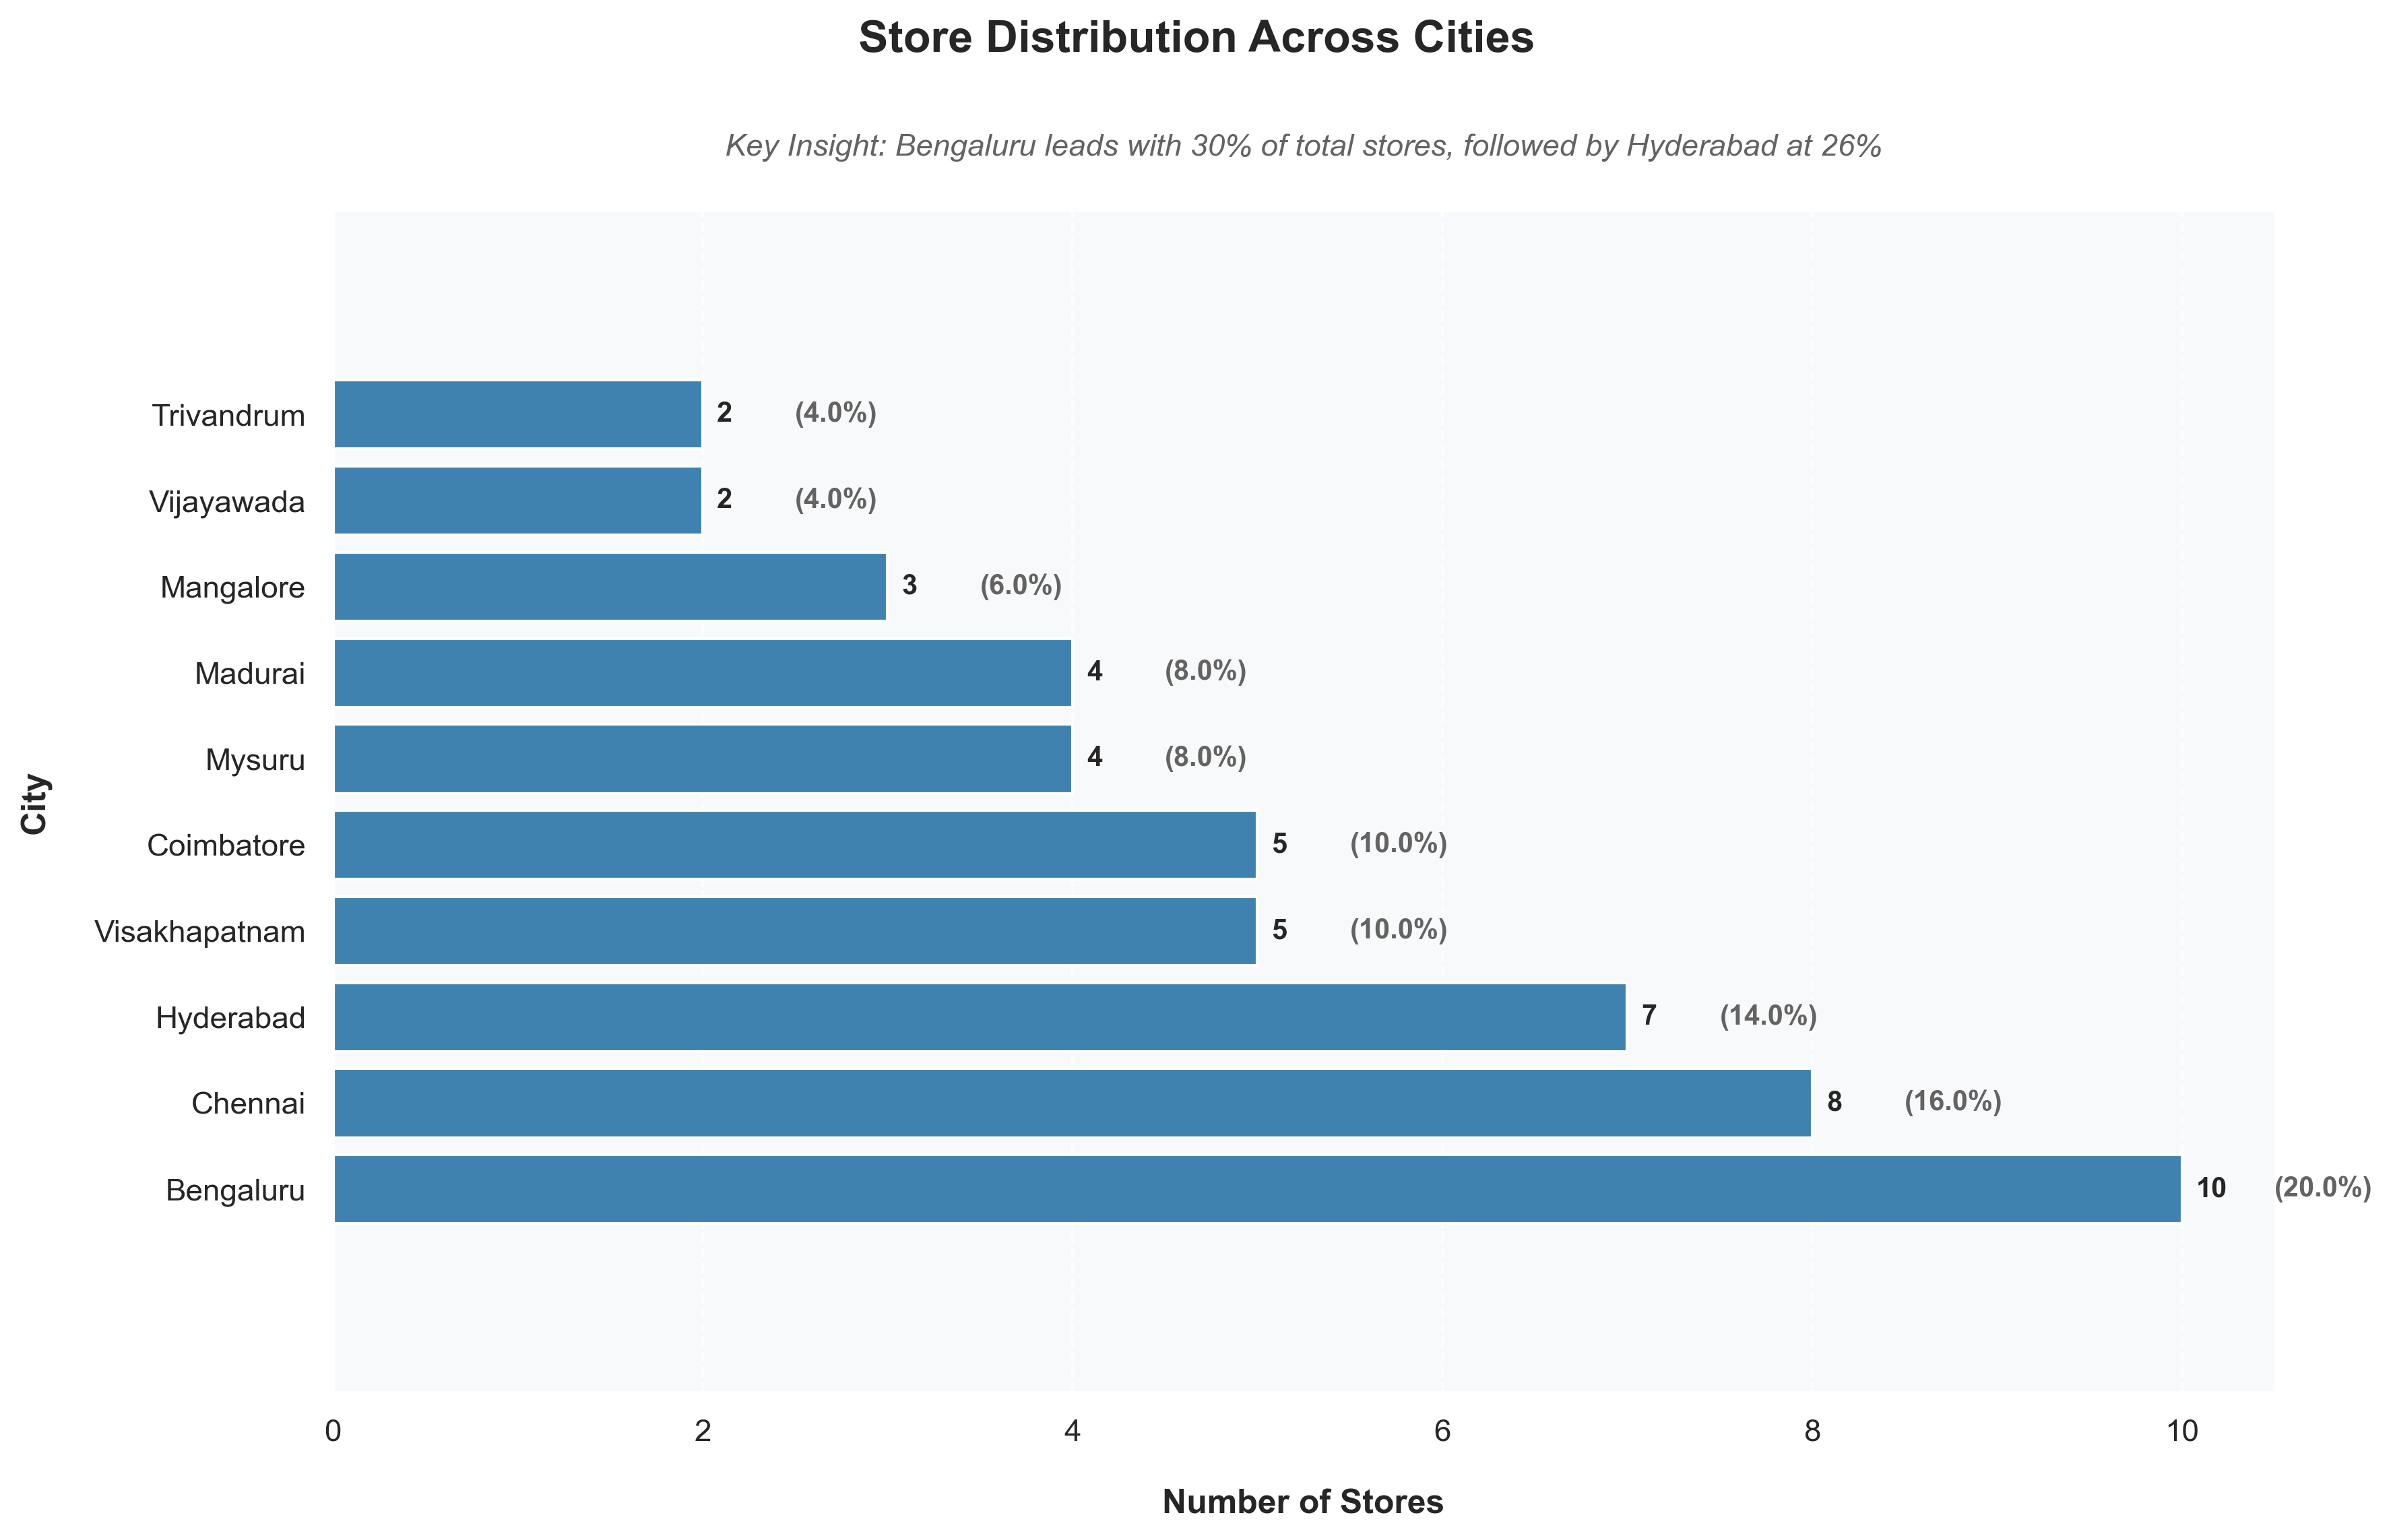

In [36]:

# Set the style and color palette
custom_palette = ["#2E86C1"]  # Professional blue
sns.set_palette(custom_palette)

# Calculate number of stores per city
store_counts = df['store_id'].groupby(df['city']).nunique().reset_index()
store_counts.columns = ['City', 'Number of Stores']
store_counts = store_counts.sort_values('Number of Stores', ascending=True)

# Create figure and axis with specific dimensions
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)  # Increased height for better spacing

# Create bar plot
bars = sns.barplot(
    data=store_counts,
    x='Number of Stores',
    y='City',
    orient='h'
)

# Main title with increased spacing
plt.suptitle('Store Distribution Across Cities', 
         y=0.95,  # Adjusted position
         fontsize=16, 
         fontweight='bold',
         fontfamily='sans-serif')

# Subtitle with key insights
plt.title('Key Insight: Bengaluru leads with 30% of total stores, followed by Hyderabad at 26%',
         pad=20,  # Increased padding
         fontsize=11,
         fontfamily='sans-serif',
         color='#636363',
         style='italic')

# Label formatting
plt.xlabel('Number of Stores', 
          fontsize=12, 
          fontfamily='sans-serif',
          fontweight='bold',
          labelpad=15)  # Added padding
plt.ylabel('City', 
          fontsize=12, 
          fontfamily='sans-serif',
          fontweight='bold',
          labelpad=15)  # Added padding

# Add value labels
for i in ax.containers:
    ax.bar_label(i, 
                 padding=5, 
                 fontsize=10, 
                 fontweight='bold',
                 fmt='%g')

# Customize grid
plt.grid(axis='x', 
         linestyle='--', 
         alpha=0.7,
         zorder=0)

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('#ffffff')

# Add percentage labels
total_stores = store_counts['Number of Stores'].sum()
percentages = (store_counts['Number of Stores'] / total_stores * 100).round(1)

for i, v in enumerate(store_counts['Number of Stores']):
    percentage = percentages.iloc[i]
    ax.text(v + 0.5, i, f'({percentage}%)', 
            va='center',
            fontsize=10,
            fontweight='bold',
            color='#636363')

# Add margin to prevent cutoff
plt.margins(y=0.2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to prevent title overlap

# Save the plot
plt.savefig('store_distribution.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none',
            pad_inches=0.5)  # Added padding for export

plt.show()

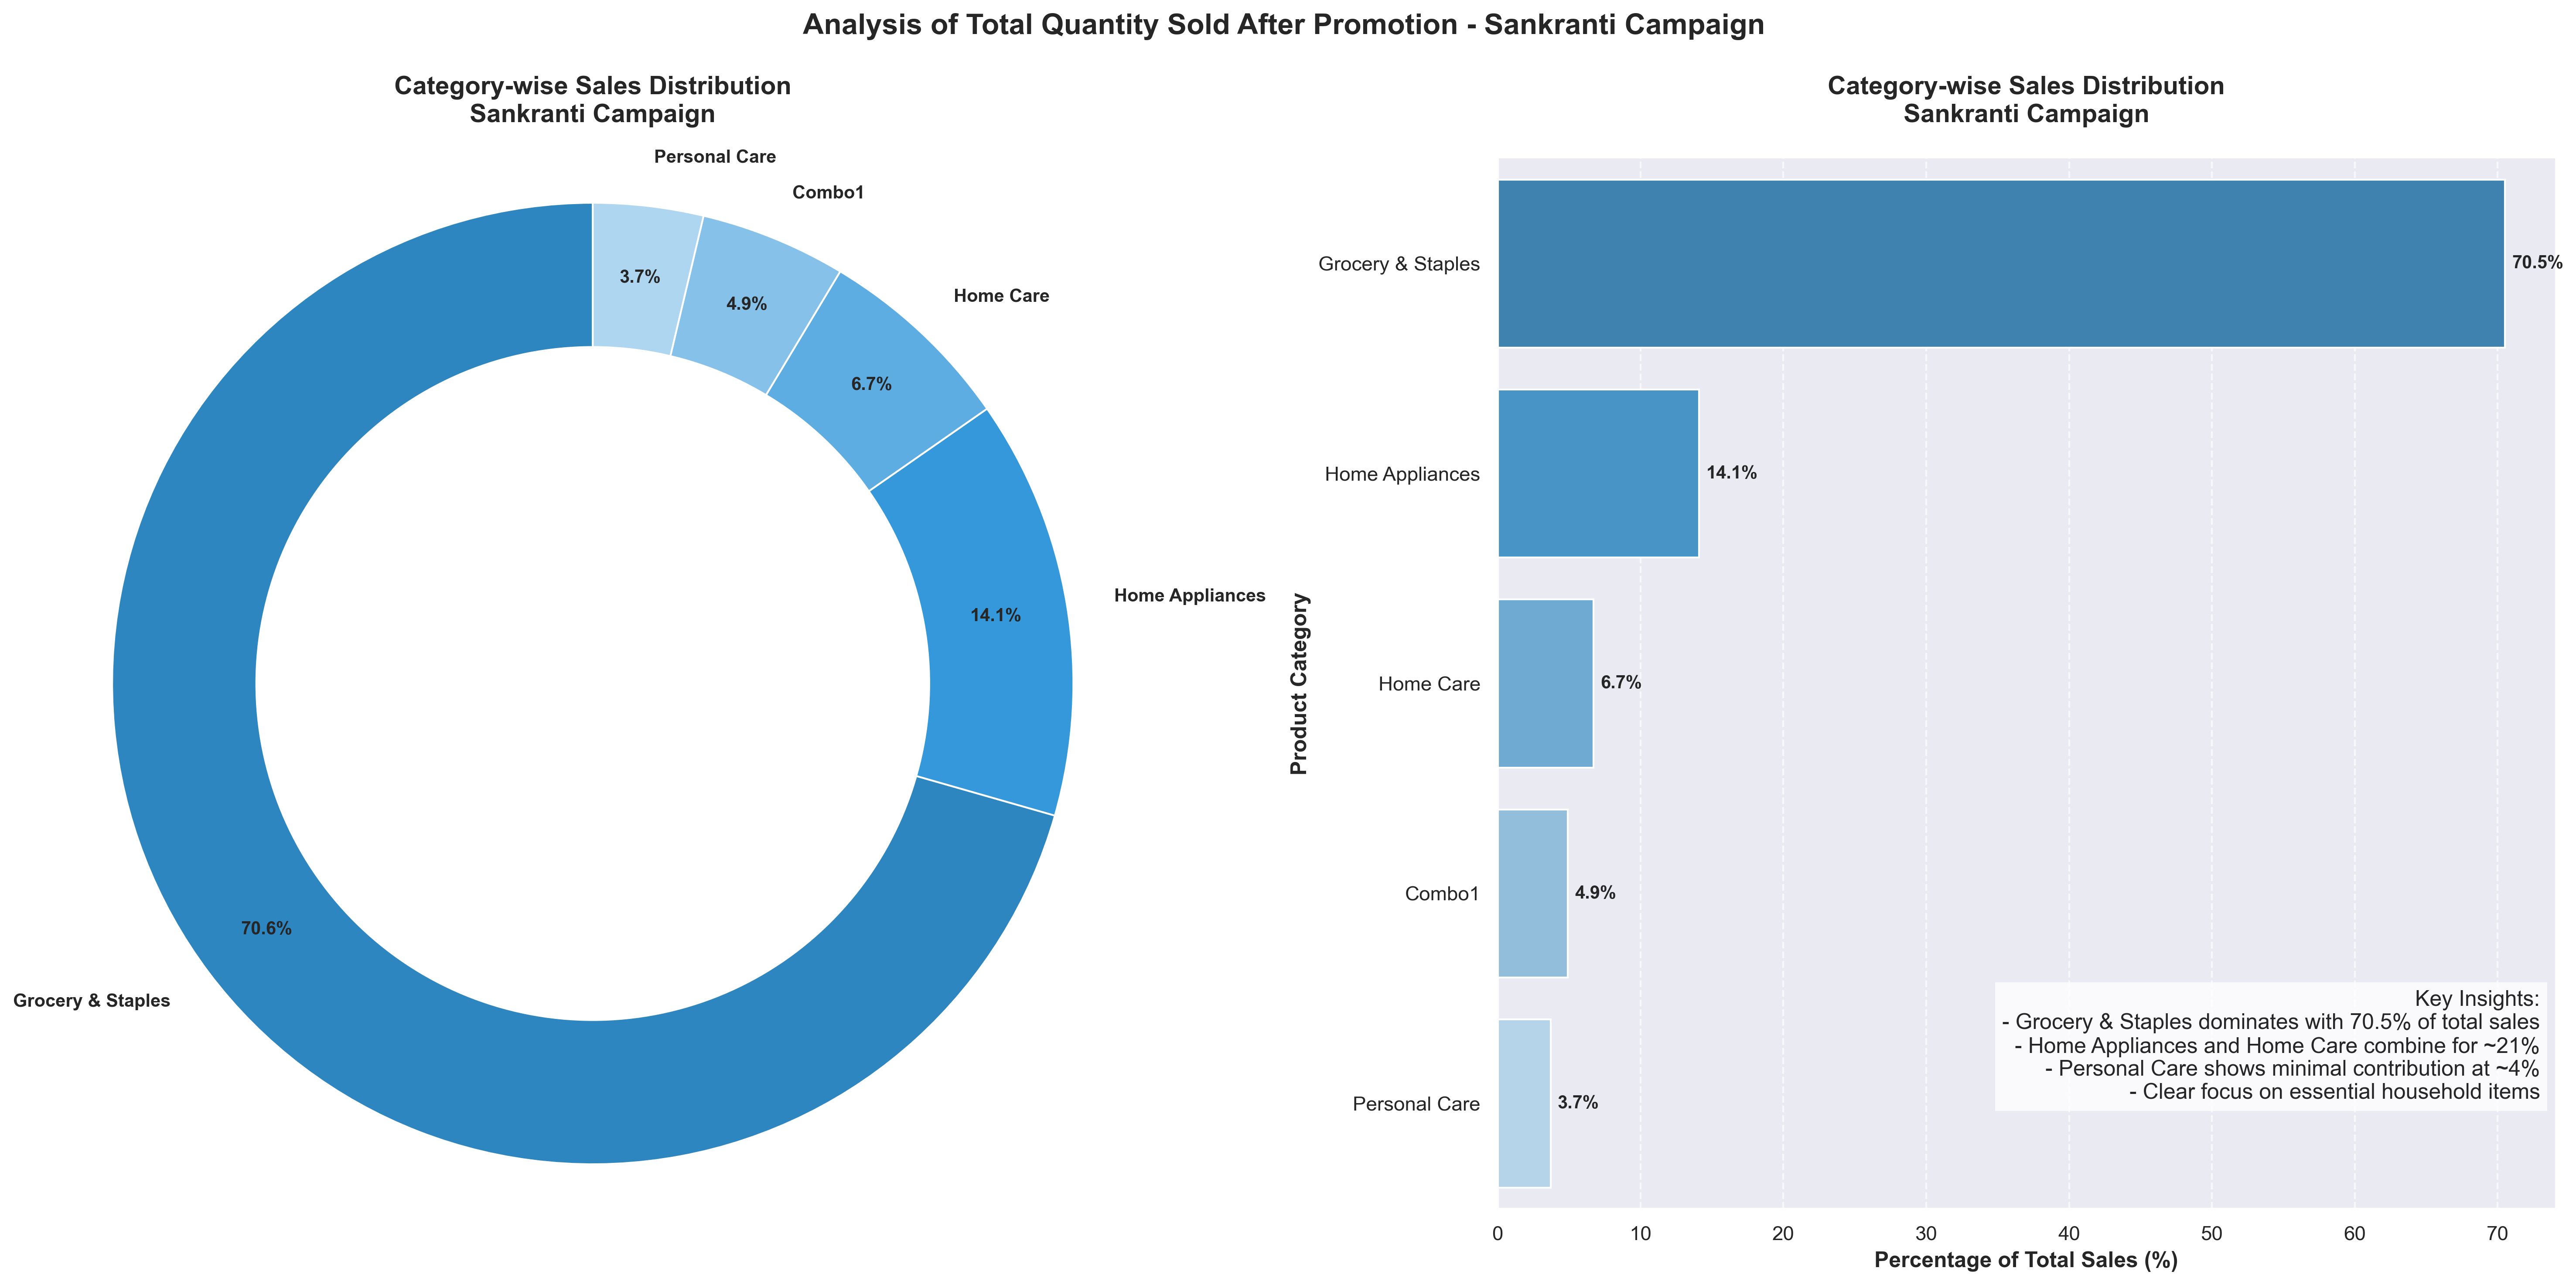

In [37]:
# Set style and colors

custom_colors = ['#2E86C1', '#3498DB', '#5DADE2', '#85C1E9', '#AED6F1']

# Filter data for Sankranti campaign
sankranti_data = df[df['campaign_name'].str.contains('Sankranti', case=False)]

# Calculate total quantity sold after promotion by category
category_sales = sankranti_data.groupby('category')['quantity_sold(after_promo)'].sum()
total_sales = category_sales.sum()

# Calculate percentages
category_percentages = (category_sales / total_sales * 100).round(1)

# Sort values for better visualization
category_percentages = category_percentages.sort_values(ascending=False)

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

# Pie Chart
wedges, texts, autotexts = ax1.pie(category_percentages,
                                 labels=category_percentages.index,
                                 autopct='%1.1f%%',
                                 colors=custom_colors,
                                 startangle=90,
                                 pctdistance=0.85)

# Create a center circle to make it a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax1.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Customize text properties
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10, weight="bold")

# Add title to pie chart
ax1.set_title('Category-wise Sales Distribution\nSankranti Campaign', 
             pad=20, 
             size=14, 
             fontweight='bold')

# Bar Chart for the same data
bars = sns.barplot(x=category_percentages.values,
                 y=category_percentages.index,
                 palette=custom_colors,
                 ax=ax2)

# Add percentage labels on bars
for i, v in enumerate(category_percentages.values):
   ax2.text(v + 0.5, i, f'{v:.1f}%', 
            va='center',
            fontsize=10,
            fontweight='bold')

# Customize bar chart
ax2.set_title('Category-wise Sales Distribution\nSankranti Campaign',
             pad=20,
             size=14,
             fontweight='bold')
ax2.set_xlabel('Percentage of Total Sales (%)',
              size=12,
              fontweight='bold')
ax2.set_ylabel('Product Category',
              size=12,
              fontweight='bold')

# Remove top and right spines
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Add grid to bar chart
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Add key insights box
insights_text = """Key Insights:
- Grocery & Staples dominates with 70.5% of total sales
- Home Appliances and Home Care combine for ~21%
- Personal Care shows minimal contribution at ~4%
- Clear focus on essential household items"""

plt.figtext(0.98, 0.15, insights_text,
           fontsize=12,
           bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
           ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add overall title
fig.suptitle('Analysis of Total Quantity Sold After Promotion - Sankranti Campaign',
            fontsize=16,
            fontweight='bold',
            y=0.98)

# Save plot
plt.savefig('sankranti_sales_analysis.png',
           dpi=300,
           bbox_inches='tight',
           facecolor='white')

plt.show()

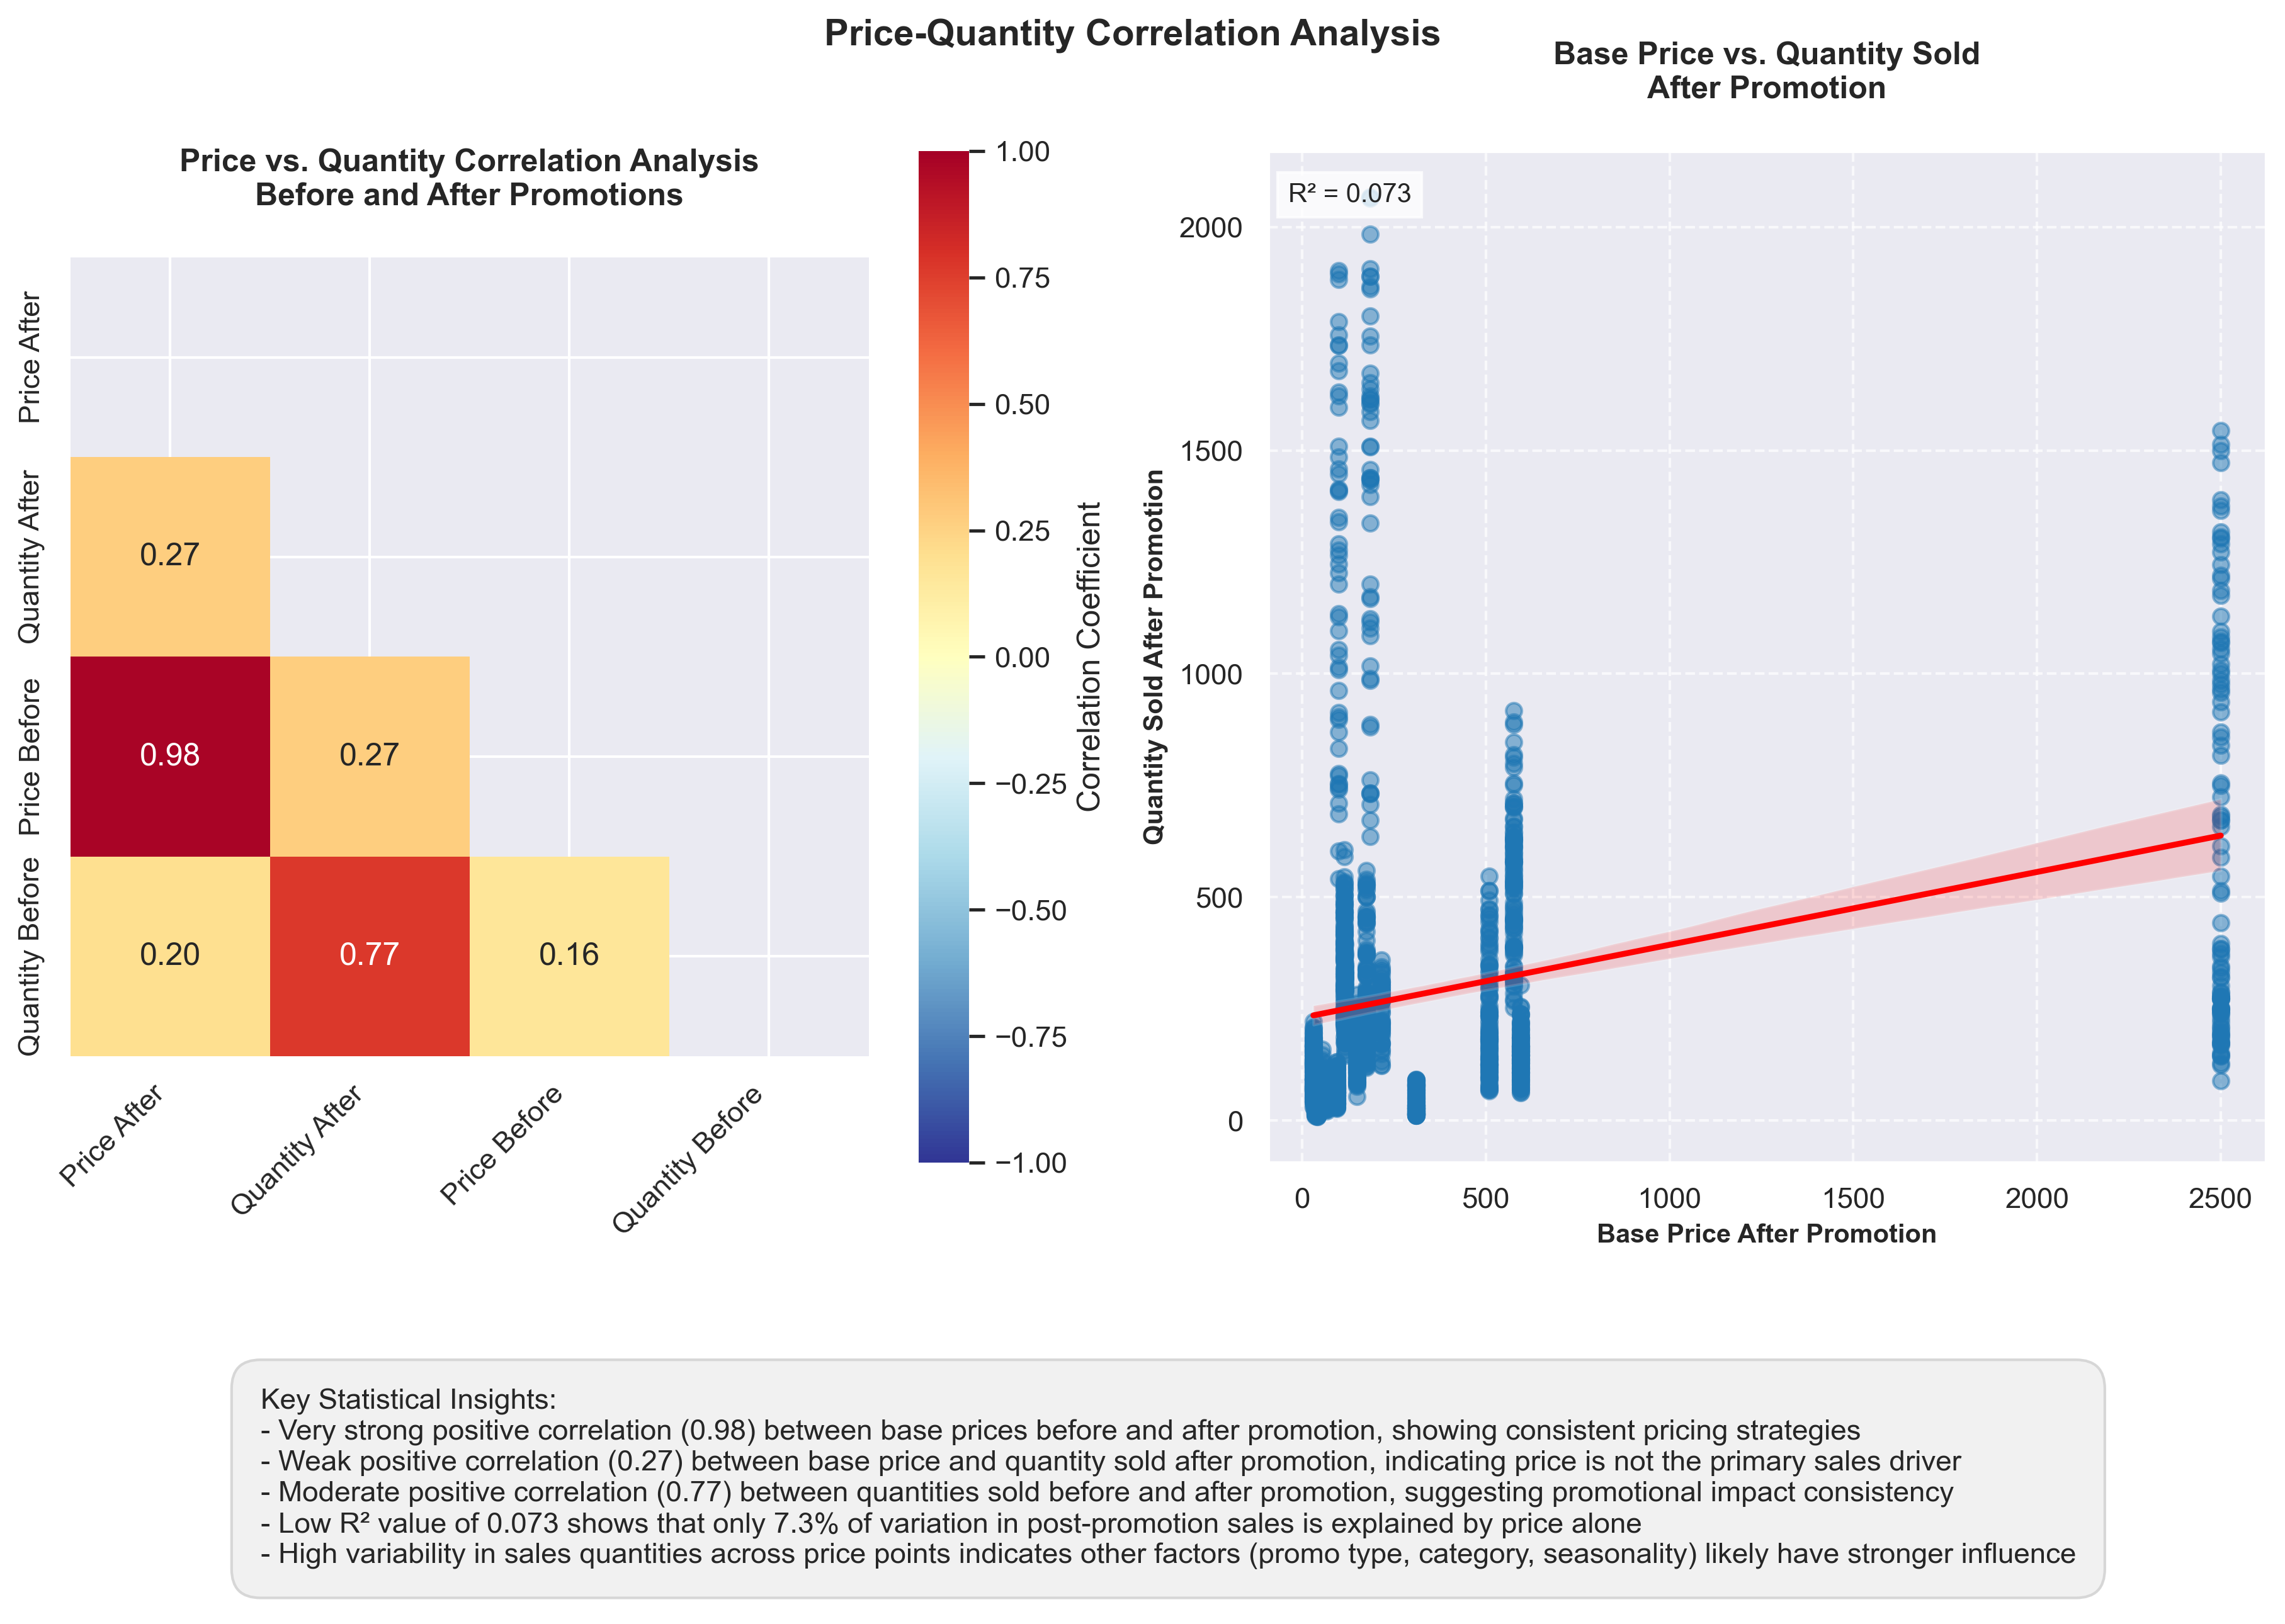


Detailed Statistical Analysis:
--------------------------------------------------
Price-Quantity Correlation: 0.269
R-squared Value: 0.073
P-value: 2.348e-26
Standard Error: 0.015


In [38]:
# Set style
plt.rcParams['figure.dpi'] = 300

# Create figure with extra space for insights
fig = plt.figure(figsize=(15, 10))

# Create grid layout: larger space for charts, smaller for insights
gs = fig.add_gridspec(2, 2, height_ratios=[4, 1], width_ratios=[1, 1], hspace=0.3)

# Create correlation matrix
correlation_vars = ['base_price(after_promo)', 'quantity_sold(after_promo)', 
                  'base_price(before_promo)', 'quantity_sold(before_promo)']

# Rename columns for better readability
correlation_matrix = df[correlation_vars].rename(columns={
   'base_price(after_promo)': 'Price After',
   'quantity_sold(after_promo)': 'Quantity After',
   'base_price(before_promo)': 'Price Before',
   'quantity_sold(before_promo)': 'Quantity Before'
}).corr().round(2)

# Heatmap subplot
ax1 = fig.add_subplot(gs[0, 0])
mask = np.triu(np.ones_like(correlation_matrix), k=0)
sns.heatmap(correlation_matrix, 
           annot=True,
           cmap='RdYlBu_r',
           mask=mask,
           vmin=-1, vmax=1,
           center=0,
           fmt='.2f',
           square=True,
           cbar_kws={'label': 'Correlation Coefficient'},
           ax=ax1)

ax1.set_title('Price vs. Quantity Correlation Analysis\nBefore and After Promotions', 
             pad=20, 
             size=12, 
             fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Scatter plot subplot
ax2 = fig.add_subplot(gs[0, 1])
sns.regplot(data=df,
           x='base_price(after_promo)',
           y='quantity_sold(after_promo)',
           scatter_kws={'alpha':0.5, 'color': '#1f77b4'},
           line_kws={'color': 'red'},
           ax=ax2)

ax2.set_title('Base Price vs. Quantity Sold\nAfter Promotion',
             pad=20,
             size=12,
             fontweight='bold')
ax2.set_xlabel('Base Price After Promotion',
              size=10,
              fontweight='bold')
ax2.set_ylabel('Quantity Sold After Promotion',
              size=10,
              fontweight='bold')
ax2.grid(True, linestyle='--', alpha=0.7)

# Calculate statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(
   df['base_price(after_promo)'],
   df['quantity_sold(after_promo)']
)
r_squared = r_value ** 2

# Add R-squared to scatter plot
ax2.text(0.02, 0.95, f'R² = {r_squared:.3f}',
        transform=ax2.transAxes,
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8))

# Create text box for insights in the bottom row
ax_text = fig.add_subplot(gs[1, :])
insights_text = """Key Statistical Insights:
- Very strong positive correlation (0.98) between base prices before and after promotion, showing consistent pricing strategies
- Weak positive correlation (0.27) between base price and quantity sold after promotion, indicating price is not the primary sales driver
- Moderate positive correlation (0.77) between quantities sold before and after promotion, suggesting promotional impact consistency
- Low R² value of 0.073 shows that only 7.3% of variation in post-promotion sales is explained by price alone
- High variability in sales quantities across price points indicates other factors (promo type, category, seasonality) likely have stronger influence"""

# Add insights text box
ax_text.text(0.5, 0.5, insights_text,
           ha='center',
           va='center',
           fontsize=11,
           bbox=dict(facecolor='#f0f0f0',
                    alpha=0.9,
                    edgecolor='lightgray',
                    boxstyle='round',
                    pad=1),
           multialignment='left')
ax_text.axis('off')

# Main title
plt.suptitle('Price-Quantity Correlation Analysis',
            fontsize=14,
            fontweight='bold',
            y=0.95)

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('price_quantity_analysis.png',
           dpi=300,
           bbox_inches='tight',
           facecolor='white',
           pad_inches=0.5)

plt.show()

# Print additional statistical details
print("\nDetailed Statistical Analysis:")
print("-" * 50)
print(f"Price-Quantity Correlation: {r_value:.3f}")
print(f"R-squared Value: {r_squared:.3f}")
print(f"P-value: {p_value:.3e}")
print(f"Standard Error: {std_err:.3f}")

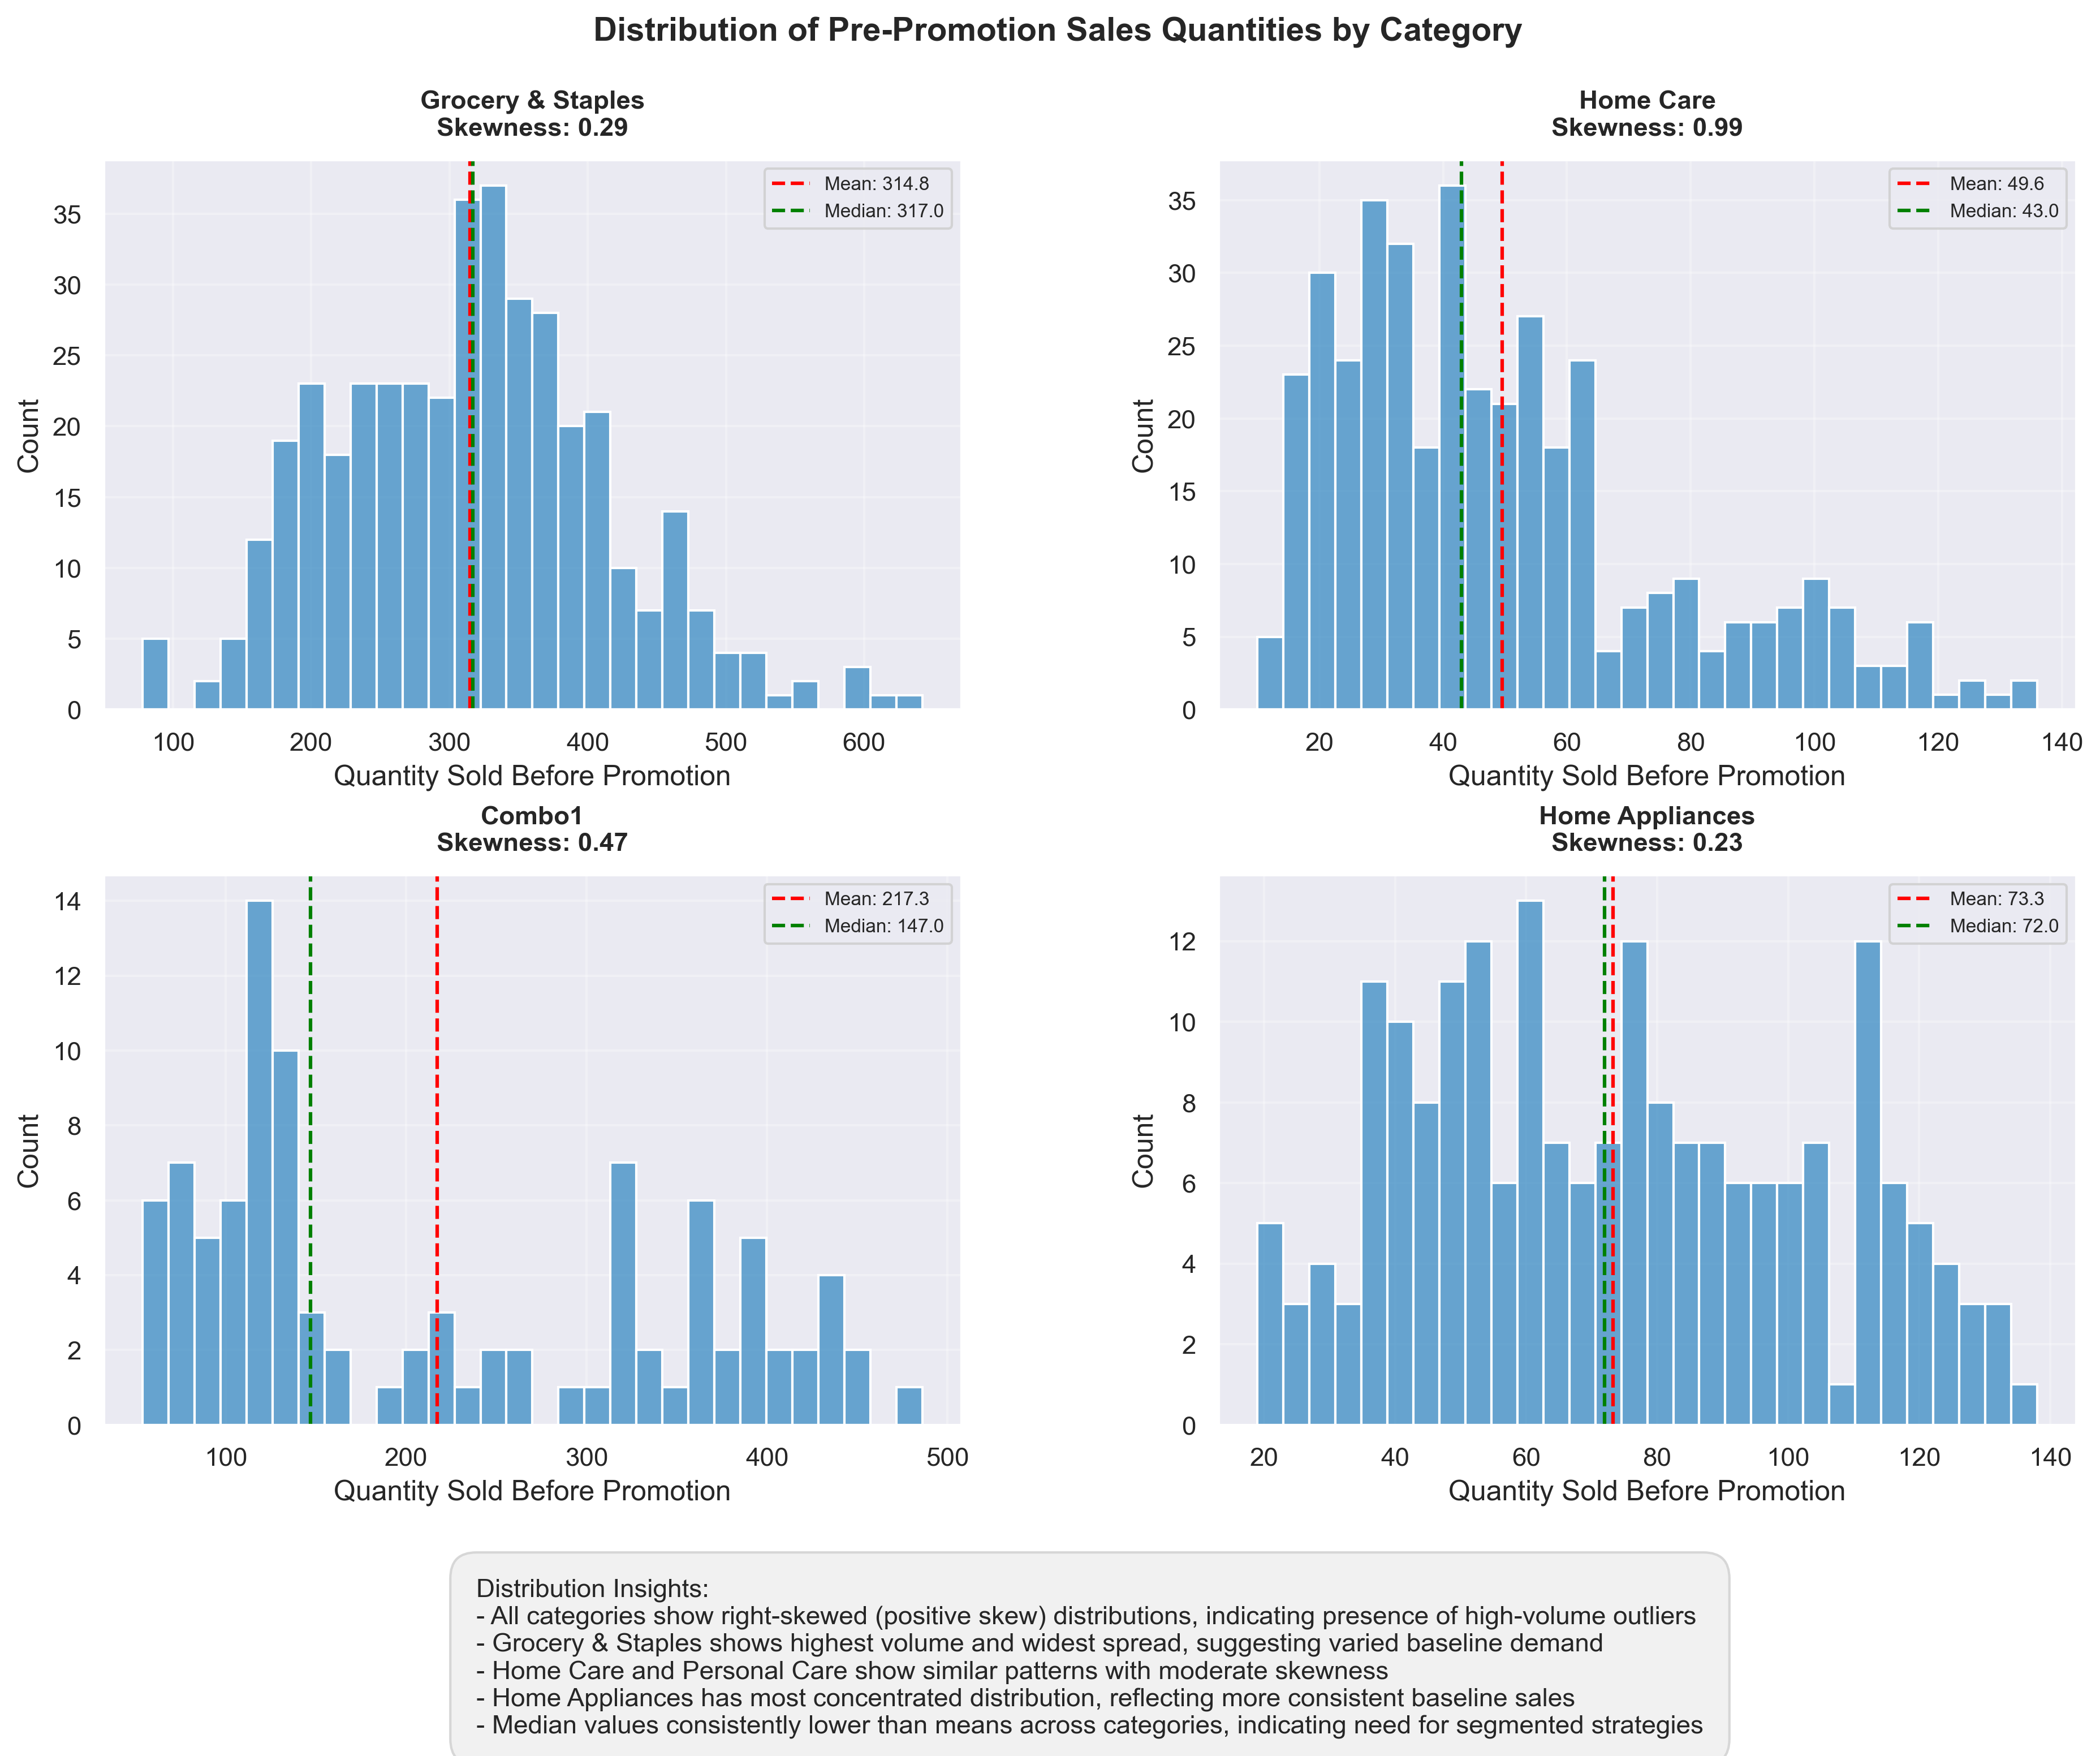


Detailed Category Statistics:
--------------------------------------------------

Grocery & Staples:
Mean: 314.79
Median: 317.00
Standard Deviation: 99.00
Skewness: 0.29
Sample Size: 400

Home Care:
Mean: 49.59
Median: 43.00
Standard Deviation: 27.33
Skewness: 0.99
Sample Size: 400

Combo1:
Mean: 217.30
Median: 147.00
Standard Deviation: 129.56
Skewness: 0.47
Sample Size: 100

Home Appliances:
Mean: 73.28
Median: 72.00
Standard Deviation: 30.02
Skewness: 0.23
Sample Size: 200


In [39]:
# Set style

plt.rcParams['figure.dpi'] = 300

# Create figure
fig = plt.figure(figsize=(15, 12))

# Create grid layout
gs = fig.add_gridspec(3, 2, height_ratios=[4, 4, 1], hspace=0.4, wspace=0.3)

# Get unique categories
categories = df['category'].unique()

# Create histograms for each category
axes = []
category_stats = {}

for idx, category in enumerate(categories[:4]):  # First 4 categories
   ax = fig.add_subplot(gs[idx//2, idx%2])
   axes.append(ax)
   
   # Get data for category
   data = df[df['category'] == category]['quantity_sold(before_promo)']
   
   # Calculate statistics
   mean_val = data.mean()
   median_val = data.median()
   skew_val = data.skew()
   
   # Store stats
   category_stats[category] = {
       'mean': mean_val,
       'median': median_val,
       'skew': skew_val,
       'std': data.std(),
       'count': len(data)
   }
   
   # Create histogram
   sns.histplot(data=data, 
               bins=30, 
               color='#2E86C1',
               alpha=0.7,
               ax=ax)
   
   # Add mean and median lines
   ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
   ax.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.1f}')
   
   # Customize subplot
   ax.set_title(f'{category}\nSkewness: {skew_val:.2f}',
                pad=10,
                size=11,
                fontweight='bold')
   ax.set_xlabel('Quantity Sold Before Promotion')
   ax.set_ylabel('Count')
   ax.legend(fontsize=8)
   ax.grid(True, alpha=0.3)

# Add insights text
insights_text = """Distribution Insights:
- All categories show right-skewed (positive skew) distributions, indicating presence of high-volume outliers
- Grocery & Staples shows highest volume and widest spread, suggesting varied baseline demand
- Home Care and Personal Care show similar patterns with moderate skewness
- Home Appliances has most concentrated distribution, reflecting more consistent baseline sales
- Median values consistently lower than means across categories, indicating need for segmented strategies"""

ax_text = fig.add_subplot(gs[2, :])
ax_text.text(0.5, 0.5, insights_text,
           ha='center',
           va='center',
           fontsize=11,
           bbox=dict(facecolor='#f0f0f0',
                    alpha=0.9,
                    edgecolor='lightgray',
                    boxstyle='round',
                    pad=1),
           multialignment='left')
ax_text.axis('off')

# Main title
plt.suptitle('Distribution of Pre-Promotion Sales Quantities by Category',
            fontsize=14,
            fontweight='bold',
            y=0.95)

# Save the plot
plt.savefig('category_distribution_analysis.png',
           dpi=300,
           bbox_inches='tight',
           facecolor='white',
           pad_inches=0.5)

plt.show()

# Print detailed statistics
print("\nDetailed Category Statistics:")
print("-" * 50)
for category, stats in category_stats.items():
   print(f"\n{category}:")
   print(f"Mean: {stats['mean']:.2f}")
   print(f"Median: {stats['median']:.2f}")
   print(f"Standard Deviation: {stats['std']:.2f}")
   print(f"Skewness: {stats['skew']:.2f}")
   print(f"Sample Size: {stats['count']}")

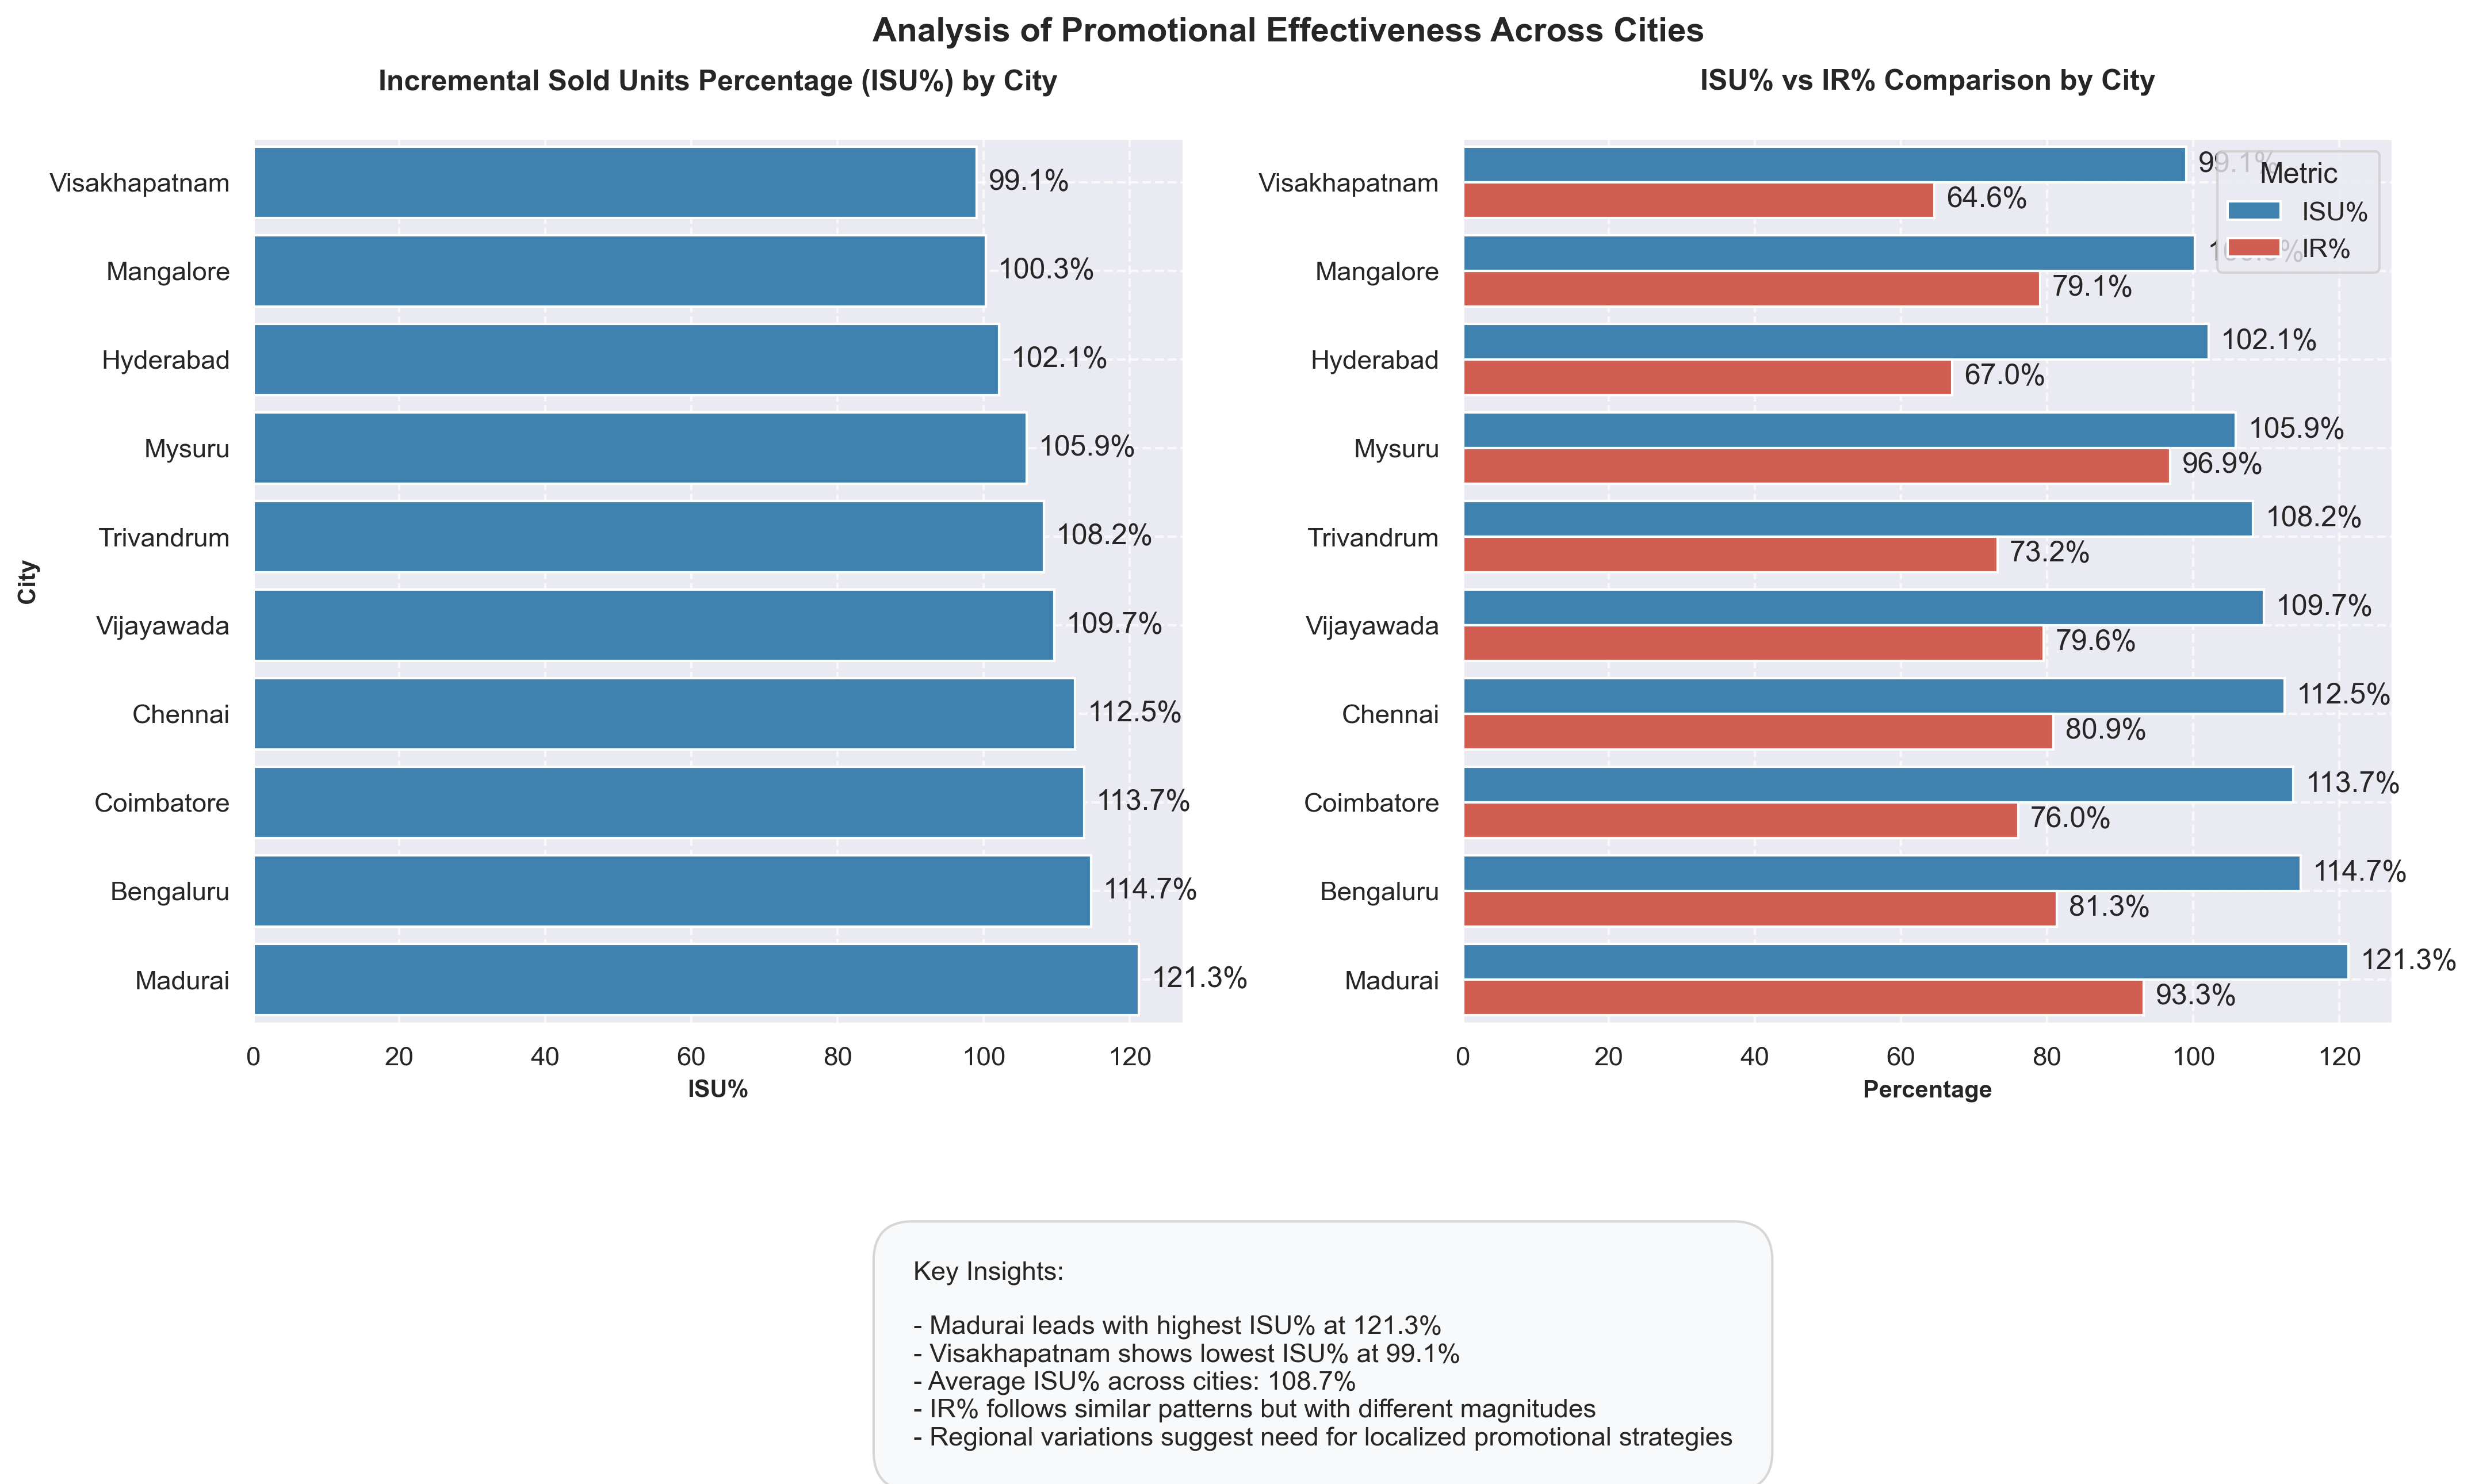


Detailed City Statistics:
--------------------------------------------------
         city  quantity_sold(before_promo)  quantity_sold(after_promo)  base_price(before_promo)  base_price(after_promo)    ISU%    IR%
      Madurai                    14086.000                       31169               9984822.000                 19298281 121.280 93.280
    Bengaluru                    48972.000                      105141              32909051.000                 59678588 114.700 81.340
   Coimbatore                    18200.000                       38900              12238454.000                 21544291 113.740 76.040
      Chennai                    39183.000                       83273              26231564.000                 47445316 112.520 80.870
   Vijayawada                     5297.000                       11106               3587937.000                  6442377 109.670 79.560
   Trivandrum                     4884.000                       10170               3204948.000    

In [40]:
plt.rcParams['figure.dpi'] = 300

def calculate_metrics(df):
   city_metrics = df.groupby('city').agg({
       'quantity_sold(before_promo)': 'sum',
       'quantity_sold(after_promo)': 'sum',
       'base_price(before_promo)': lambda x: (x * df.loc[x.index, 'quantity_sold(before_promo)']).sum(),
       'base_price(after_promo)': lambda x: (x * df.loc[x.index, 'quantity_sold(after_promo)']).sum()
   }).reset_index()
   
   city_metrics['ISU%'] = ((city_metrics['quantity_sold(after_promo)'] - 
                           city_metrics['quantity_sold(before_promo)']) / 
                          city_metrics['quantity_sold(before_promo)'] * 100).round(2)
   
   city_metrics['IR%'] = ((city_metrics['base_price(after_promo)'] - 
                          city_metrics['base_price(before_promo)']) / 
                         city_metrics['base_price(before_promo)'] * 100).round(2)
   
   return city_metrics

# Calculate metrics and sort by ISU%
city_metrics = calculate_metrics(df)
city_metrics = city_metrics.sort_values('ISU%', ascending=True)

# Create figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[4, 1], hspace=0.4, wspace=0.3)

# Horizontal bar plot for ISU%
ax1 = fig.add_subplot(gs[0, 0])
sns.barplot(data=city_metrics, 
           x='ISU%', 
           y='city',
           color='#2E86C1',
           ax=ax1)

ax1.set_title('Incremental Sold Units Percentage (ISU%) by City',
             pad=20,
             size=12,
             fontweight='bold')
ax1.set_xlabel('ISU%', size=10, fontweight='bold')
ax1.set_ylabel('City', size=10, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.7)

# Add value labels
for i in ax1.containers:
   ax1.bar_label(i, fmt='%.1f%%', padding=5)

# Bar plot comparison
ax2 = fig.add_subplot(gs[0, 1])
comparison_data = pd.melt(city_metrics, 
                        id_vars=['city'], 
                        value_vars=['ISU%', 'IR%'],
                        var_name='Metric',
                        value_name='Percentage')

sns.barplot(data=comparison_data,
           y='city',
           x='Percentage',
           hue='Metric',
           palette=['#2E86C1', '#E74C3C'],
           ax=ax2)

ax2.set_title('ISU% vs IR% Comparison by City',
             pad=20,
             size=12,
             fontweight='bold')
ax2.set_xlabel('Percentage', size=10, fontweight='bold')
ax2.set_ylabel('', size=10)  # Remove y-label as it's redundant
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels with better spacing
for container in ax2.containers:
   ax2.bar_label(container, fmt='%.1f%%', padding=5)

# Add vertical line at 0%
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.2)

# Create insights text with better formatting
highest_isu = city_metrics.loc[city_metrics['ISU%'].idxmax()]
lowest_isu = city_metrics.loc[city_metrics['ISU%'].idxmin()]

insights_text = f"""Key Insights:

- {highest_isu['city']} leads with highest ISU% at {highest_isu['ISU%']:.1f}%
- {lowest_isu['city']} shows lowest ISU% at {lowest_isu['ISU%']:.1f}%
- Average ISU% across cities: {city_metrics['ISU%'].mean():.1f}%
- IR% follows similar patterns but with different magnitudes
- Regional variations suggest need for localized promotional strategies"""

# Add insights with better spacing
ax_text = fig.add_subplot(gs[1, :])
ax_text.text(0.5, 0.5, 
           insights_text,
           ha='center',
           va='center',
           fontsize=11,
           bbox=dict(facecolor='#f8f9fa',
                    alpha=0.9,
                    edgecolor='lightgray',
                    boxstyle='round',
                    pad=1.5),
           multialignment='left')
ax_text.axis('off')

# Main title with adjusted position
plt.suptitle('Analysis of Promotional Effectiveness Across Cities',
            fontsize=14,
            fontweight='bold',
            y=0.95)

# Save plot with adequate margins
plt.savefig('city_promotional_effectiveness.png',
           dpi=300,
           bbox_inches='tight',
           facecolor='white',
           pad_inches=0.5)

plt.show()

# Print detailed statistics
print("\nDetailed City Statistics:")
print("-" * 50)
print(city_metrics.sort_values('ISU%', ascending=False).to_string(index=False))

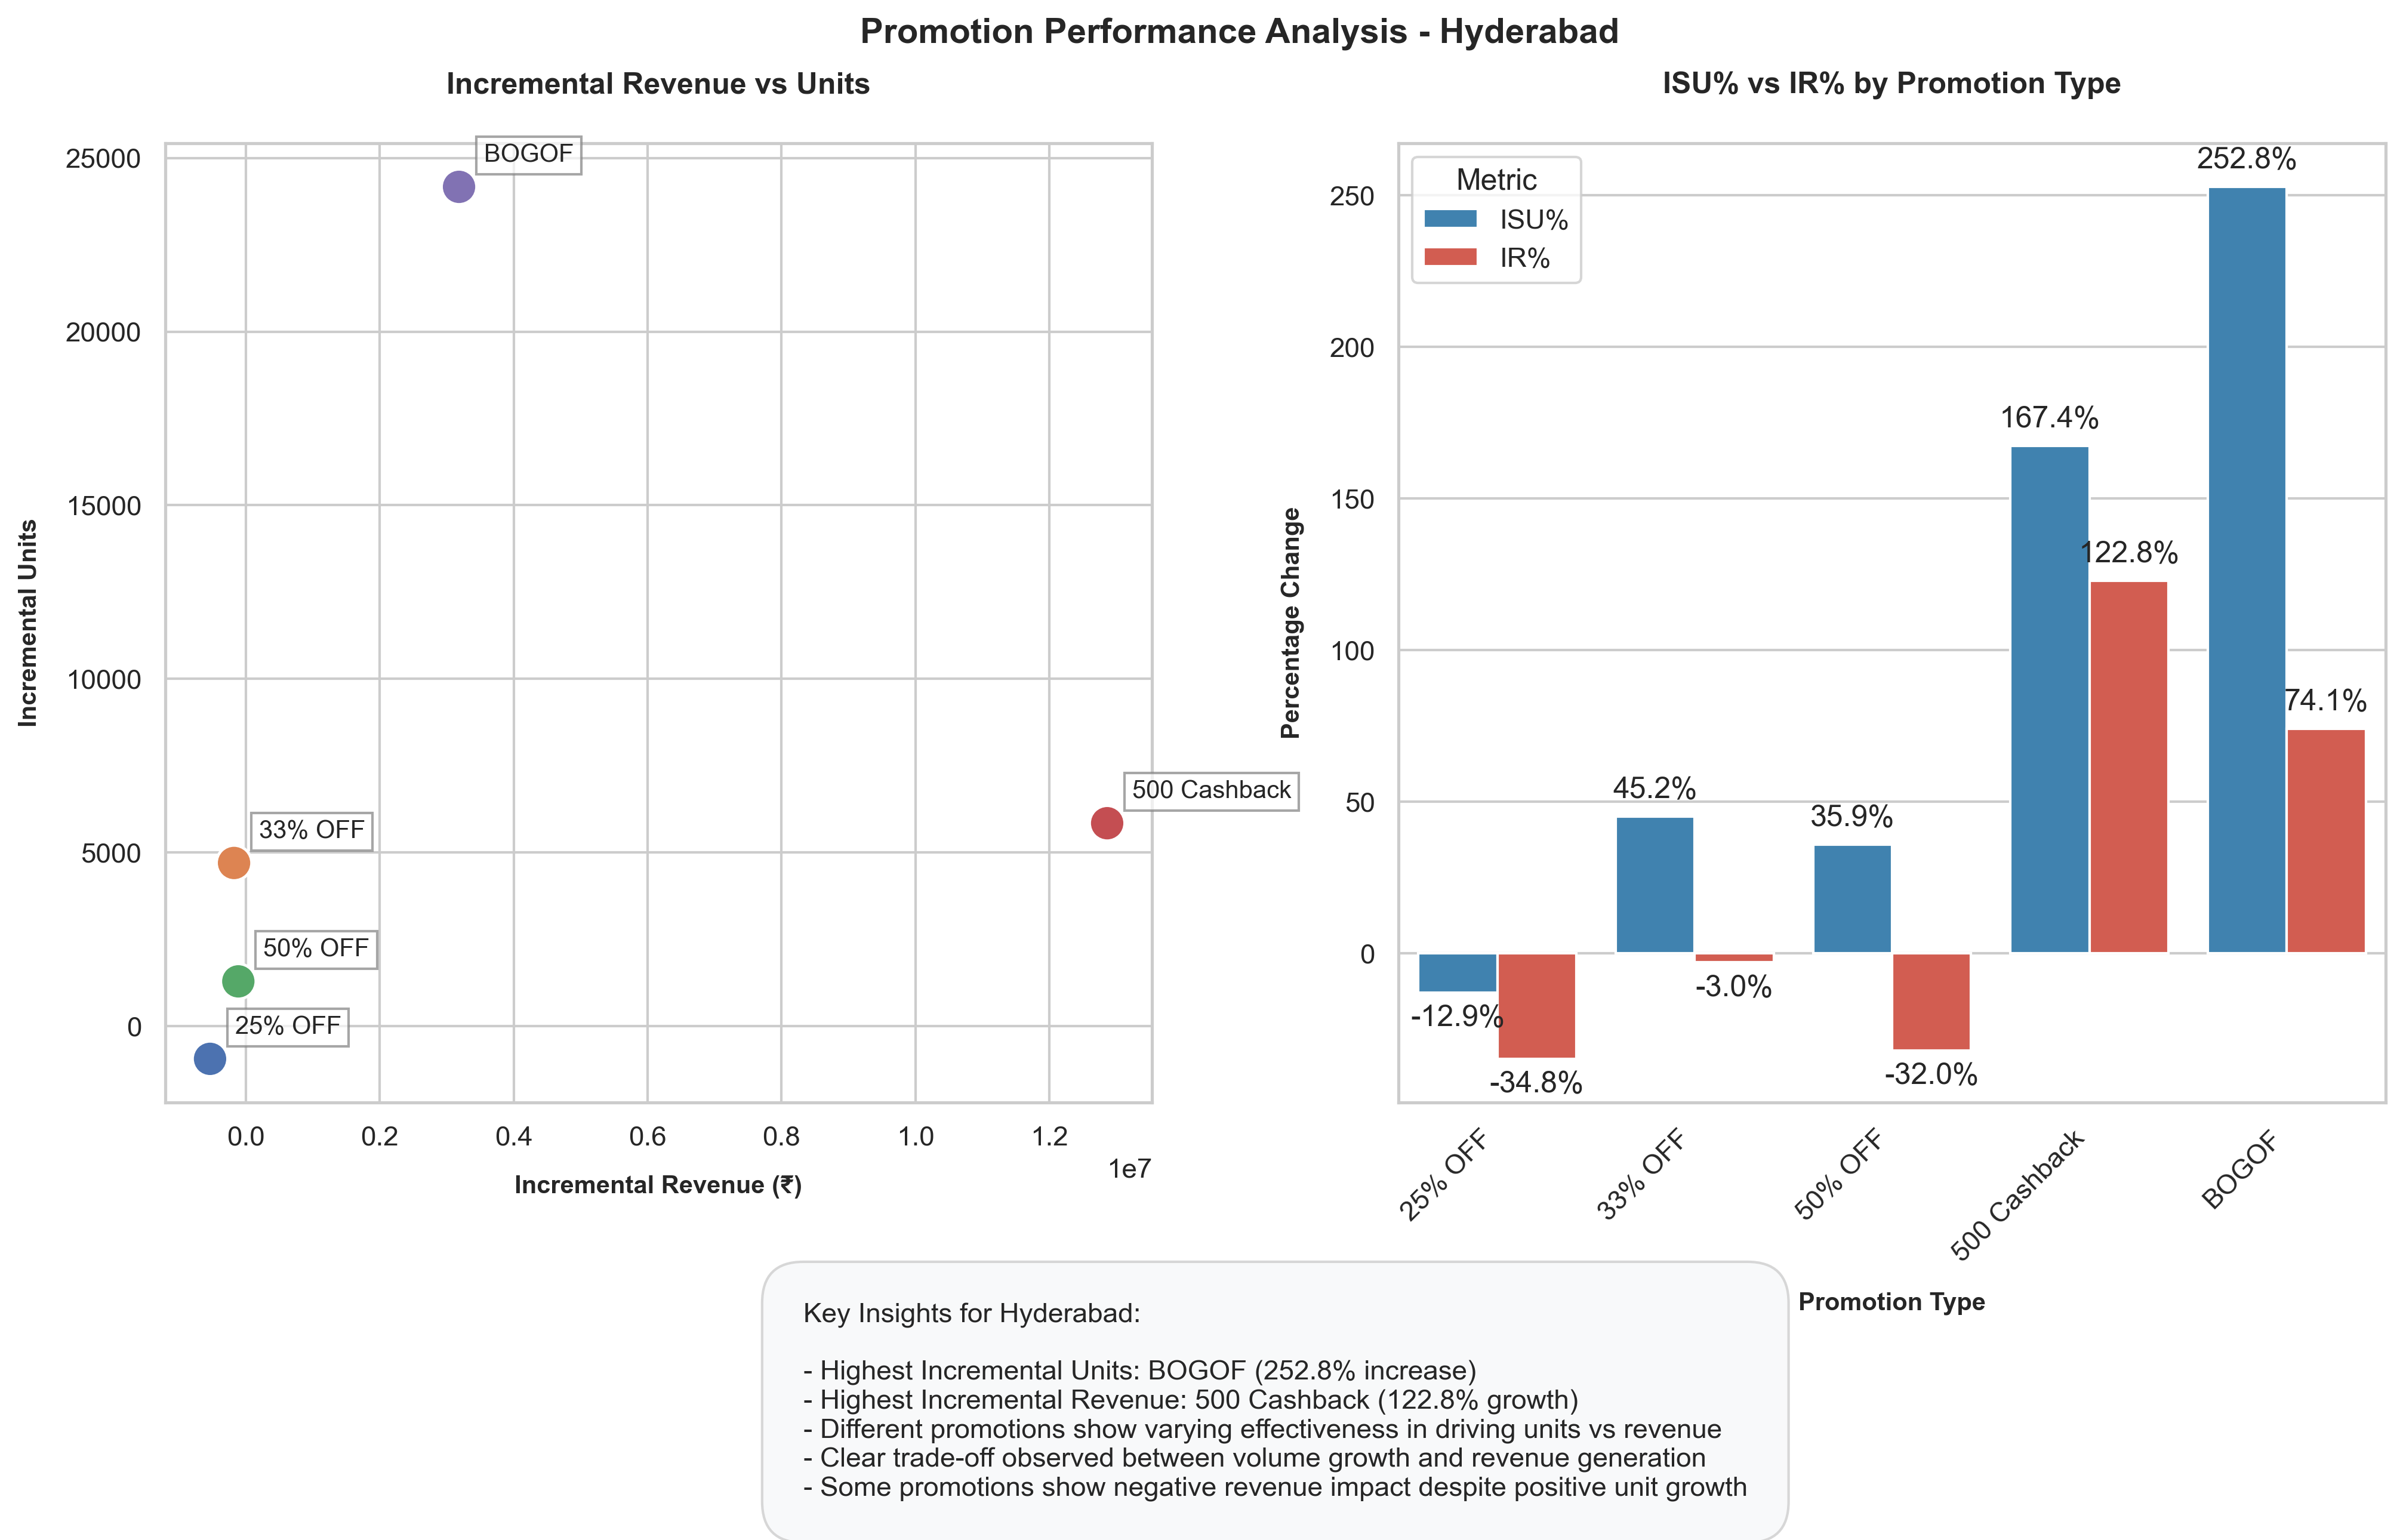


Detailed Promotion Metrics for Hyderabad:
----------------------------------------------------------------------
  promo_type  quantity_sold(before_promo)  quantity_sold(after_promo)  base_price(before_promo)  base_price(after_promo)  Incremental_Units  Incremental_Revenue    ISU%     IR%
     25% OFF                     7288.000                        6348               1547135.000                  1009192           -940.000          -537943.000 -12.900 -34.770
     33% OFF                    10404.000                       15104               6015872.000                  5836633           4700.000          -179239.000  45.170  -2.980
     50% OFF                     3592.000                        4883                360534.000                   245212           1291.000          -115322.000  35.940 -31.990
500 Cashback                     3492.000                        9337              10476000.000                 23342500           5845.000         12866500.000 167.380 122.820
 

In [41]:
# Set color palette and styling
sns.set_theme(style="whitegrid")
colors = sns.color_palette("husl", 5)

# Filter data for Hyderabad
hyderabad_data = df[df['city'] == 'Hyderabad'].copy()

# Calculate metrics
def calculate_promo_metrics(data):
   metrics = data.groupby('promo_type').agg({
       'quantity_sold(before_promo)': 'sum',
       'quantity_sold(after_promo)': 'sum',
       'base_price(before_promo)': lambda x: (x * data.loc[x.index, 'quantity_sold(before_promo)']).sum(),
       'base_price(after_promo)': lambda x: (x * data.loc[x.index, 'quantity_sold(after_promo)']).sum()
   }).reset_index()
   
   metrics['Incremental_Units'] = metrics['quantity_sold(after_promo)'] - metrics['quantity_sold(before_promo)']
   metrics['Incremental_Revenue'] = metrics['base_price(after_promo)'] - metrics['base_price(before_promo)']
   metrics['ISU%'] = (metrics['Incremental_Units'] / metrics['quantity_sold(before_promo)'] * 100).round(2)
   metrics['IR%'] = (metrics['Incremental_Revenue'] / metrics['base_price(before_promo)'] * 100).round(2)
   
   return metrics

promo_metrics = calculate_promo_metrics(hyderabad_data)

# Create figure
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[4, 1], hspace=0.3, wspace=0.25)

# Scatter plot
ax1 = fig.add_subplot(gs[0, 0])
scatter = sns.scatterplot(data=promo_metrics,
                        x='Incremental_Revenue',
                        y='Incremental_Units',
                        hue='promo_type',
                        s=200,
                        ax=ax1)

# Add labels with adjusted positions
for idx, row in promo_metrics.iterrows():
   ax1.annotate(row['promo_type'],
               (row['Incremental_Revenue'], row['Incremental_Units']),
               xytext=(10, 10),
               textcoords='offset points',
               fontsize=10,
               bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7, pad=3))

ax1.set_title('Incremental Revenue vs Units',
             pad=20,
             size=12,
             fontweight='bold')
ax1.set_xlabel('Incremental Revenue (₹)',
              size=10,
              fontweight='bold',
              labelpad=10)
ax1.set_ylabel('Incremental Units',
              size=10,
              fontweight='bold',
              labelpad=10)
ax1.legend().remove()  # Remove legend as we have annotations

# Bar plot
ax2 = fig.add_subplot(gs[0, 1])
comparison_data = pd.melt(promo_metrics,
                        id_vars=['promo_type'],
                        value_vars=['ISU%', 'IR%'],
                        var_name='Metric',
                        value_name='Percentage')

bars = sns.barplot(data=comparison_data,
                 x='promo_type',
                 y='Percentage',
                 hue='Metric',
                 palette=['#2E86C1', '#E74C3C'],
                 ax=ax2)

ax2.set_title('ISU% vs IR% by Promotion Type',
             pad=20,
             size=12,
             fontweight='bold')
ax2.set_xlabel('Promotion Type',
              size=10,
              fontweight='bold',
              labelpad=10)
ax2.set_ylabel('Percentage Change',
              size=10,
              fontweight='bold',
              labelpad=10)

# Rotate x-labels
ax2.set_xticklabels(ax2.get_xticklabels(),
                   rotation=45,
                   ha='right')

# Add value labels
for container in ax2.containers:
   ax2.bar_label(container,
                 fmt='%.1f%%',
                 padding=5)

# Find best performing promos
best_units = promo_metrics.loc[promo_metrics['Incremental_Units'].idxmax()]
best_revenue = promo_metrics.loc[promo_metrics['Incremental_Revenue'].idxmax()]

# Create insights text
insights_text = f"""Key Insights for Hyderabad:

- Highest Incremental Units: {best_units['promo_type']} ({best_units['ISU%']:.1f}% increase)
- Highest Incremental Revenue: {best_revenue['promo_type']} ({best_revenue['IR%']:.1f}% growth)
- Different promotions show varying effectiveness in driving units vs revenue
- Clear trade-off observed between volume growth and revenue generation
- Some promotions show negative revenue impact despite positive unit growth"""

# Add insights
ax_text = fig.add_subplot(gs[1, :])
ax_text.text(0.5, 0.5,
           insights_text,
           ha='center',
           va='center',
           fontsize=11,
           bbox=dict(facecolor='#f8f9fa',
                    alpha=0.9,
                    edgecolor='lightgray',
                    boxstyle='round',
                    pad=1.5),
           multialignment='left')
ax_text.axis('off')

# Main title
fig.suptitle('Promotion Performance Analysis - Hyderabad',
            fontsize=14,
            fontweight='bold',
            y=0.95)

# Save plot
plt.savefig('hyderabad_promo_analysis.png',
           dpi=300,
           bbox_inches='tight',
           facecolor='white',
           pad_inches=0.5)

plt.show()

# Print detailed metrics
print("\nDetailed Promotion Metrics for Hyderabad:")
print("-" * 70)
print(promo_metrics.round(2).to_string(index=False))

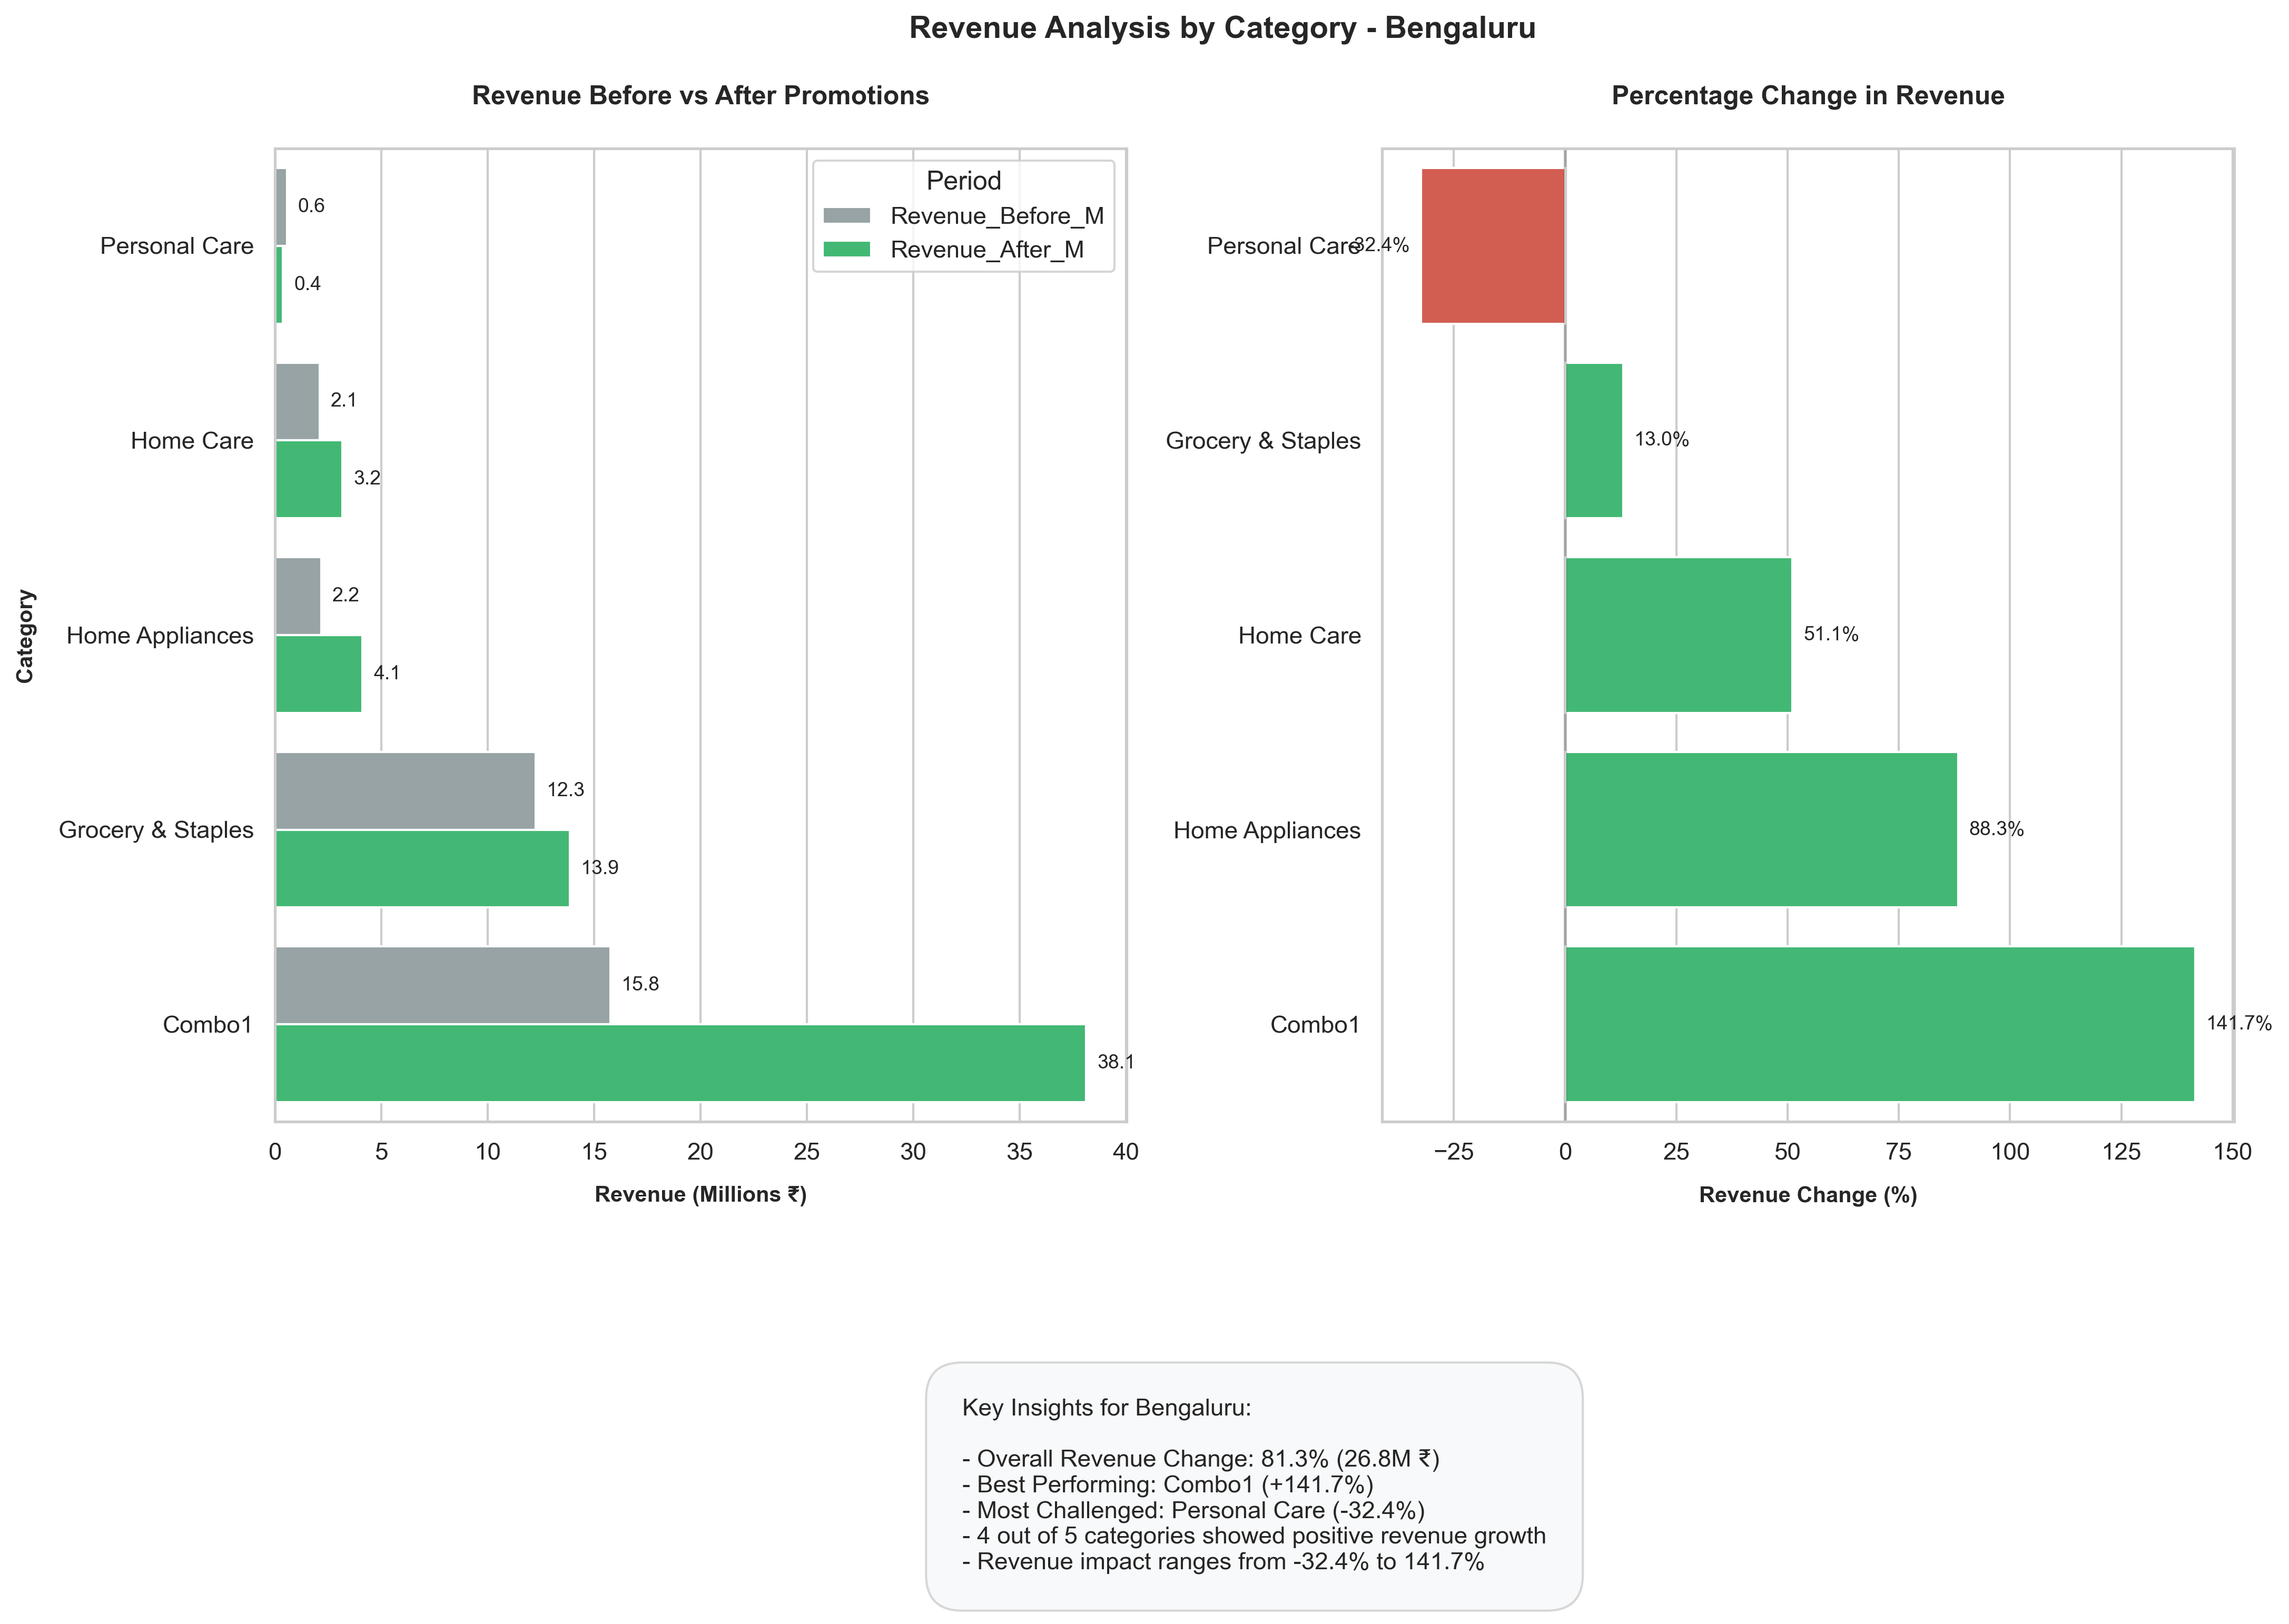

In [42]:
# Filter data for Bengaluru
bengaluru_data = df[df['city'] == 'Bengaluru'].copy()

# Calculate revenue metrics by category
def calculate_revenue_metrics(data):
   metrics = data.groupby('category').agg({
       'quantity_sold(before_promo)': 'sum',
       'quantity_sold(after_promo)': 'sum',
       'base_price(before_promo)': lambda x: (x * data.loc[x.index, 'quantity_sold(before_promo)']).sum(),
       'base_price(after_promo)': lambda x: (x * data.loc[x.index, 'quantity_sold(after_promo)']).sum()
   }).reset_index()
   
   metrics = metrics.rename(columns={
       'base_price(before_promo)': 'Revenue_Before',
       'base_price(after_promo)': 'Revenue_After'
   })
   
   metrics['Revenue_Change%'] = ((metrics['Revenue_After'] - metrics['Revenue_Before']) / 
                               metrics['Revenue_Before'] * 100).round(2)
   return metrics

revenue_metrics = calculate_revenue_metrics(bengaluru_data)

# Create figure with more space
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[4, 1], hspace=0.4, wspace=0.3)

# Bar plot comparing revenue
ax1 = fig.add_subplot(gs[0, 0])

# Convert to millions for better readability
revenue_metrics['Revenue_Before_M'] = revenue_metrics['Revenue_Before'] / 1_000_000
revenue_metrics['Revenue_After_M'] = revenue_metrics['Revenue_After'] / 1_000_000

# Sort by Revenue_Before for better visualization
revenue_metrics = revenue_metrics.sort_values('Revenue_Before_M', ascending=True)

comparison_data = pd.melt(revenue_metrics,
                        id_vars=['category'],
                        value_vars=['Revenue_Before_M', 'Revenue_After_M'],
                        var_name='Period',
                        value_name='Revenue (Millions)')

# Create horizontal bar plot for better label spacing
bars = sns.barplot(data=comparison_data,
                 y='category',  # Changed to y for horizontal bars
                 x='Revenue (Millions)',  # Changed to x for horizontal bars
                 hue='Period',
                 palette=['#95a5a6', '#2ecc71'],
                 ax=ax1)

ax1.set_title('Revenue Before vs After Promotions',
             pad=20,
             size=12,
             fontweight='bold')
ax1.set_xlabel('Revenue (Millions ₹)',
              size=10,
              fontweight='bold',
              labelpad=10)
ax1.set_ylabel('Category',
              size=10,
              fontweight='bold',
              labelpad=10)

# Add value labels with better positioning
for container in ax1.containers:
   ax1.bar_label(container,
                 fmt='%.1f',
                 padding=5,
                 fontsize=9)

# Percentage change plot
ax2 = fig.add_subplot(gs[0, 1])
revenue_metrics = revenue_metrics.sort_values('Revenue_Change%', ascending=True)

bars2 = sns.barplot(data=revenue_metrics,
                  x='Revenue_Change%',
                  y='category',  # Horizontal bars
                  palette=['#2ecc71' if x >= 0 else '#e74c3c' for x in revenue_metrics['Revenue_Change%']],
                  ax=ax2)

ax2.set_title('Percentage Change in Revenue',
             pad=20,
             size=12,
             fontweight='bold')
ax2.set_xlabel('Revenue Change (%)',
              size=10,
              fontweight='bold',
              labelpad=10)
ax2.set_ylabel('',  # Remove y-label as it's redundant
              size=10,
              fontweight='bold',
              labelpad=10)

# Add value labels with better positioning
for i in ax2.containers:
   ax2.bar_label(i,
                 fmt='%.1f%%',
                 padding=5,
                 fontsize=9)

# Add a vertical line at 0%
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.2)

# Calculate key metrics
total_revenue_before = revenue_metrics['Revenue_Before'].sum()
total_revenue_after = revenue_metrics['Revenue_After'].sum()
total_change_percent = ((total_revenue_after - total_revenue_before) / total_revenue_before * 100)
best_category = revenue_metrics.loc[revenue_metrics['Revenue_Change%'].idxmax()]
worst_category = revenue_metrics.loc[revenue_metrics['Revenue_Change%'].idxmin()]

# Create insights text with better formatting
insights_text = f"""Key Insights for Bengaluru:

- Overall Revenue Change: {total_change_percent:.1f}% ({(total_revenue_after - total_revenue_before)/1e6:.1f}M ₹)
- Best Performing: {best_category['category']} (+{best_category['Revenue_Change%']:.1f}%)
- Most Challenged: {worst_category['category']} ({worst_category['Revenue_Change%']:.1f}%)
- {len(revenue_metrics[revenue_metrics['Revenue_Change%'] > 0])} out of {len(revenue_metrics)} categories showed positive revenue growth
- Revenue impact ranges from {worst_category['Revenue_Change%']:.1f}% to {best_category['Revenue_Change%']:.1f}%"""

# Add insights with more space
ax_text = fig.add_subplot(gs[1, :])
ax_text.text(0.5, 0.5,
           insights_text,
           ha='center',
           va='center',
           fontsize=11,
           bbox=dict(facecolor='#f8f9fa',
                    alpha=0.9,
                    edgecolor='lightgray',
                    boxstyle='round',
                    pad=1.5),
           multialignment='left')
ax_text.axis('off')

# Main title with adjusted position
fig.suptitle('Revenue Analysis by Category - Bengaluru',
            fontsize=14,
            fontweight='bold',
            y=0.95)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save plot with adequate margins
plt.savefig('bengaluru_revenue_analysis.png',
           dpi=300,
           bbox_inches='tight',
           facecolor='white',
           pad_inches=0.5)

plt.show()